<a href="https://colab.research.google.com/github/Nathalia-Prada/proyecto-integrador-equipo25/blob/main/Avance1Equipo25/Avance1Equipo25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance 1. Análisis exploratorio de datos**

Objetivos:

- 2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

- 2.2 Abordar y corregir los problemas identificados en los datos.



###**Equipo 25**


### Estudiantes


* A01793899 - Andrés Julián López Hurtado
* A01793999 - Nathalia Milena Prada Hernández
* A01794404 - Victor Alejandro Regueira Romero

Fecha: 29 de septiebre de 2024

# Instrucciones

Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

* ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?
* ¿Cuáles son las estadísticas resumidas del conjunto de datos?
* ¿Hay valores atípicos en el conjunto de datos?
* ¿Cuál es la cardinalidad de las variables categóricas?
* ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
* ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
* ¿Hay correlación entre las variables dependientes e independientes?
* ¿Cómo se distribuyen los datos en función de diferentes categorías?
* ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
* ¿Se deberían normalizar las imágenes para visualizarlas mejor?
* ¿Hay desequilibrio en las clases de la variable objetivo?

# Análsis Exploratorio de los Datos (EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
DIR = "/content/drive/MyDrive/TECForza"
os.chdir(DIR)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Mounted at /content/drive


# Tabla silver_consumption

In [ ]:

# Ruta al archivo
file = 'silver_consumption.csv'

# Leer el archivo
df_consumption= pd.read_csv(file)

In [ ]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42705 entries, 0 to 42704
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     42705 non-null  int64  
 1   date                     42705 non-null  object 
 2   total_distance_used_sum  42705 non-null  float64
 3   total_fuel_used_sum      42705 non-null  float64
 4   consumption              42560 non-null  float64
 5   performance              42038 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:

# Verificar si hay filas duplicadas
duplicate_rows = df_consumption[df_consumption.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

# Verificar si hay filas con valores en cero
rows_with_zero = df_consumption[(df_consumption == 0).any(axis=1)]
print("Number of rows with at least one zero value:", len(rows_with_zero))

# Verificar si hay valores faltantes
print("\nMissing Values:")
print(df_consumption.isnull().sum())


Number of duplicate rows: 0
Number of rows with at least one zero value: 2330

Missing Values:
name                         0
date                         0
total_distance_used_sum      0
total_fuel_used_sum          0
consumption                145
performance                667
dtype: int64


**Nota importante sobre los datos**
* Name: es un número que identifica el camión. Es un entero pero representa un elemento, es decir, no tiene sentido sacar una estadística numerica como promedios o algo así sino más bien una descriptiva.
* Date: en la fecha en la que se realiza el registro. Es un objeto.
* total_distance_used_sum: es la distancia total recorrida en millas. Es un número con decimales.
* Consumption y performance: son relaciones. Consumption es la división entre distancia y total_fuel. Performance es el inverso.

Dicho lo anterior, debemos buscar los valores en cero de las columnas total_fuel y total_distance.

In [ ]:

# Verificar si hay filas duplicadas
duplicate_rows = df_consumption[df_consumption.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

# Verificar si hay algún valor cero en las columnas 'total_distance_used_sum' o 'total_fuel_used_sum'
rows_with_zero = df_consumption[(df_consumption['total_distance_used_sum'] == 0) |
                                (df_consumption['total_fuel_used_sum'] == 0)]

# Mostrar cuántas filas tienen valores cero en alguna de esas columnas
print("Número de filas con al menos un valor cero en 'total_distance_used_sum' o 'total_fuel_used_sum':", len(rows_with_zero))

# Mostrar los primeros registros que tienen valores cero
#rows_with_zero.head()


# Verificar si hay valores faltantes
print("\nMissing Values:")
print(df_consumption.isnull().sum())


Number of duplicate rows: 0
Número de filas con al menos un valor cero en 'total_distance_used_sum' o 'total_fuel_used_sum': 2330

Missing Values:
name                         0
date                         0
total_distance_used_sum      0
total_fuel_used_sum          0
consumption                145
performance                667
dtype: int64


¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

* Hay 2330 filas de las 42705 donde alguno de los datos total_fuel y total_distance son cero. Estos valores deberías elminarse.
* Hay 812 filas donde se encontraron valores nulos. Todos estos valores deberían quitarse también.

Sí se reconocen patrones de ausencia. Los casos en que alguno de los valores de distancia o consumo de combustible son cero, generan errores en los valores de consumption y performance o valores cero.

Con estas dos informaciones vamos a proceder a crear un data frame df_consumption_limpio donde ya no tenga esta información.

In [ ]:
# Eliminar filas donde total_distance_used_sum o total_fuel_used_sum sean igual a cero
df_consumption_limpio = df_consumption[
    (df_consumption['total_distance_used_sum'] != 0) |
    (df_consumption['total_fuel_used_sum'] != 0)
]

# Eliminar filas con valores nulos
df_consumption_limpio = df_consumption_limpio.dropna()

# Mostrar el nuevo dataframe limpio
print(df_consumption_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40375 entries, 0 to 42704
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     40375 non-null  int64  
 1   date                     40375 non-null  object 
 2   total_distance_used_sum  40375 non-null  float64
 3   total_fuel_used_sum      40375 non-null  float64
 4   consumption              40375 non-null  float64
 5   performance              40375 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.2+ MB
None


Luego de la limpieza, a este data frame le quedaró el 94,5% de la información disponible (40375 de 42705)

**Estadística descriptiva**

vamos a separar las variables categóricas de las variables numéricas así:
* Variables categóricas: name, date.
* Variables numéricas: total_distance_used_sum, total_fuel_used_sum, consumption y performance.

Con esto vamos a generar las estadísticas descriptivas.

In [ ]:
# Lista de variables categóricas
variables_categoricas = ['name', 'date']

# Lista de variables numéricas
variables_numericas = ['total_distance_used_sum', 'total_fuel_used_sum', 'consumption', 'performance']


**Análisis variables numéricas**

In [ ]:
# Obtener estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
df_consumption_limpio[variables_numericas].describe()

Estadísticas descriptivas de las variables numéricas:


,total_distance_used_sum,total_fuel_used_sum,consumption,performance
count,40375.000000,40375.000000,40375.000000,40375.000000
mean,620.193296,60.569598,8.461822,0.148258
std,439.203065,35.737487,2.218248,0.495052
min,0.621371,0.264172,0.039202,0.000302
25%,333.054856,33.549844,7.559750,0.081844
50%,570.418578,59.702872,8.571378,0.116667
75%,800.325848,81.100804,8.959763,0.132280
max,3396.413886,234.320564,14.865050,25.508625


El análisis de las variables numéricas del dataset muestra que, para la columna total_distance_used_sum, la media es de 620.19 millas recorridas, con una desviación estándar de 439.20 millas, y los valores oscilan entre 0.62 y 3396.41 millas. En cuanto a total_fuel_used_sum, el promedio de combustible utilizado es de 60.57 unidades, con una desviación estándar de 35.74, y un rango que va desde 0.26 hasta 234.32 unidades. La columna consumption tiene una media de 8.46, con una desviación estándar de 2.22, y sus valores varían entre 0.04 y 14.87. Finalmente, en performance, el promedio es de 0.15, con una desviación estándar de 0.49, y los valores fluctúan entre 0.0003 y 25.51. Estos datos permiten identificar tanto la tendencia central como la dispersión de las diferentes métricas de rendimiento y consumo en la flota de vehículos analizada.

**Variables categóricas**

In [ ]:
for column in variables_categoricas:
    print(f"Estadísticas de la variable categórica: {column}")
    print("Frecuencia de valores:")
    print(df_consumption_limpio[column].value_counts())  # Frecuencia de cada valor
    print(f"Cantidad de valores únicos: {df_consumption[column].nunique()}")  # Número de valores únicos
    print(f"Valor más frecuente: {df_consumption_limpio[column].mode()[0]}")  # Valor más común
    print("\n")

Estadísticas de la variable categórica: name
Frecuencia de valores:
name
894     61
714     61
1016    61
639     61
934     61
        ..
75       1
1326     1
443      1
805      1
1340     1
Name: count, Length: 892, dtype: int64
Cantidad de valores únicos: 902
Valor más frecuente: 602


Estadísticas de la variable categórica: date
Frecuencia de valores:
date
2024-08-28    805
2024-08-29    800
2024-08-27    794
2024-08-30    775
2024-08-26    765
             ... 
2024-07-21    544
2024-08-11    539
2024-07-14    535
2024-08-04    532
2024-07-07    511
Name: count, Length: 61, dtype: int64
Cantidad de valores únicos: 61
Valor más frecuente: 2024-08-28




Del análisis anterior, observamos que hay camiones los cuales aparecen apenas una única vez, por lo que va a ser necesario tomar la decisión de dejar o no estos datos. Esta situación se analizará mejor cuando se responda lo relacionado con el balanceo de los datos para el modelo.

En todo caso vamos a calcular la cardinalidad de las variables categóricas, es decir, la cantidad de valores únicos que estas variables (name y date) pueden tomar.
* Name tiene 892 valores únicos
* Date tiene 61 valores unicos pues corresponden a dos meses de datos.

In [ ]:
# Calcular la cardinalidad de las variables categóricas
cardinalidad_name = df_consumption_limpio['name'].nunique()
cardinalidad_date = df_consumption_limpio['date'].nunique()

# Crear un diccionario con las cardinalidades
cardinalidad_categoricas = {
    'name': cardinalidad_name,
    'date': cardinalidad_date
}

cardinalidad_categoricas

{'name': 892, 'date': 61}

##*Distribuciones de los datos en consumption*##


En los suiguientes gráficos se muestra la distribución de las variables numéricas.

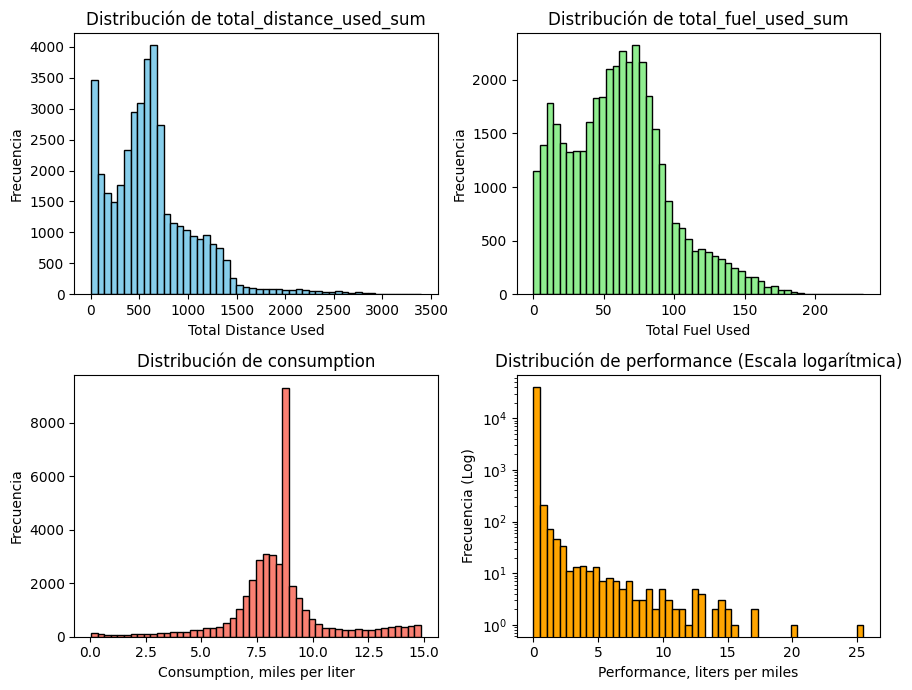

In [ ]:
# Crear una figura con un grid de 2x2 para las distribuciones de las cuatro variables numéricas
plt.figure(figsize=(9, 7))

# Subplot 1: total_distance_used_sum
plt.subplot(2, 2, 1)
plt.hist(df_consumption_limpio['total_distance_used_sum'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de total_distance_used_sum')
plt.xlabel('Total Distance Used')
plt.ylabel('Frecuencia')

# Subplot 2: total_fuel_used_sum
plt.subplot(2, 2, 2)
plt.hist(df_consumption_limpio['total_fuel_used_sum'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de total_fuel_used_sum')
plt.xlabel('Total Fuel Used')
plt.ylabel('Frecuencia')

# Subplot 3: consumption
plt.subplot(2, 2, 3)
plt.hist(df_consumption_limpio['consumption'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribución de consumption')
plt.xlabel('Consumption, miles per liter')
plt.ylabel('Frecuencia')

# Subplot 4: performance (eje Y logarítmico)
plt.subplot(2, 2, 4)
plt.hist(df_consumption_limpio['performance'], bins=50, color='orange', edgecolor='black')
plt.yscale('log')
plt.title('Distribución de performance (Escala logarítmica)')
plt.xlabel('Performance, liters per miles')
plt.ylabel('Frecuencia (Log)')

# Ajustar los subplots
plt.tight_layout()
plt.show()

Es interesante el comportamiento de la variable consumtpion en millas por litro (recordar que es la división entre la distancia recorrida y el consumo total de combustible). La normalidad de los datos es evidente aunqye hay un valor que tiene una frecuencia muy alta. También que hay casos en los que se logra más millas por galón, la parte derecha de la distribución.

En el caso del performance, en litros por milla, que corresponde al inverso de la gráfica de consumption. Para poder mejorar la visualización tuvimos que representar el eje y en escala logarítmica. Notar que hay situaciones donde se han registrado consumos de combutible mayores a 0,8 litros por milla. Esto representa el 0,8% de los datos. El performance con mayor frecuencia es entre 0,1 y 0,2 litros por milla (64%)

In [ ]:
# Crear los intervalos de 0.1 para la variable 'performance'
bins = np.arange(0, 1.1, 0.1)

# Agrupar los datos de 'performance' en los intervalos y contar las frecuencias
performance_freq = pd.cut(df_consumption_limpio['performance'], bins=bins, include_lowest=True).value_counts().sort_index()

# Calcular el porcentaje de los datos en cada intervalo
performance_freq_percentage = (performance_freq / len(df_consumption_limpio['performance'])) * 100

performance_freq_percentage

,count
performance,
"(-0.001, 0.1]",31.078638
"(0.1, 0.2]",63.754799
"(0.2, 0.3]",2.712074
"(0.3, 0.4]",0.770279
"(0.4, 0.5]",0.408669
"(0.5, 0.6]",0.195666
"(0.6, 0.7]",0.099071
"(0.7, 0.8]",0.076780
"(0.8, 0.9]",0.118885


**Normalización de los datos**

Los datos claramente tienen un sesgo. vamos a probar varias transformaciones a los datos para intentar buscar la mejor alternativa. Usaré raíz cuadrada, logarítmo y Box-Cox. Como se verá, la transformación que genera los datos con las mejores distribuciones es la de Box-Cox.


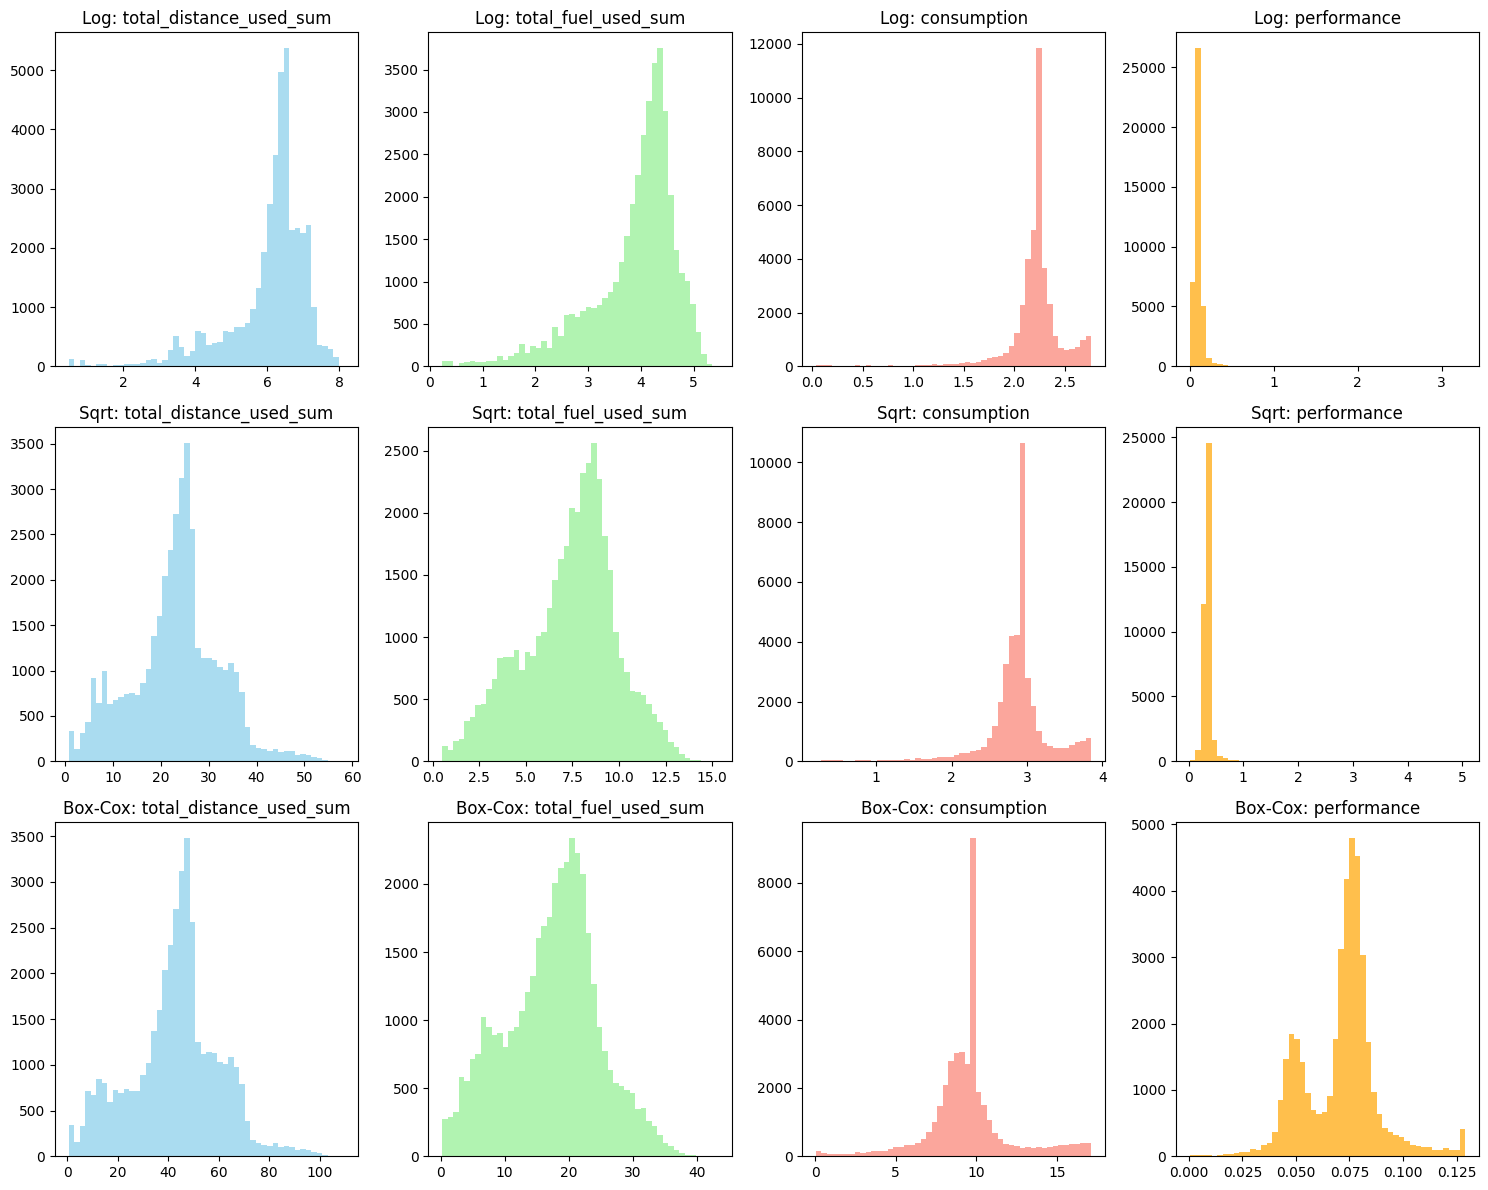

In [ ]:
import numpy as np
from scipy import stats

# Crear una copia del dataframe para aplicar las transformaciones
df_transform = df_consumption_limpio[variables_numericas].copy()

# 1. Transformación logarítmica
log_transform = np.log1p(df_transform)

# 2. Transformación raíz cuadrada
sqrt_transform = np.sqrt(df_transform)

# 3. Transformación Box-Cox
# Añadir 1 a las columnas para evitar errores en Box-Cox si hay ceros o valores negativos
boxcox_transform = df_transform.copy()
for col in variables_numericas:
    boxcox_transform[col], _ = stats.boxcox(df_transform[col] + 1)


# Crear gráficos para comparar las distribuciones de las tres transformaciones con los colores personalizados
plt.figure(figsize=(15, 12))

# Distribución Logarítmica
plt.subplot(3, 4, 1)
plt.hist(log_transform['total_distance_used_sum'], bins=50, color='skyblue', alpha=0.7)
plt.title('Log: total_distance_used_sum')

plt.subplot(3, 4, 2)
plt.hist(log_transform['total_fuel_used_sum'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Log: total_fuel_used_sum')

plt.subplot(3, 4, 3)
plt.hist(log_transform['consumption'], bins=50, color='salmon', alpha=0.7)
plt.title('Log: consumption')

plt.subplot(3, 4, 4)
plt.hist(log_transform['performance'], bins=50, color='orange', alpha=0.7)
plt.title('Log: performance')

# Distribución Raíz Cuadrada
plt.subplot(3, 4, 5)
plt.hist(sqrt_transform['total_distance_used_sum'], bins=50, color='skyblue', alpha=0.7)
plt.title('Sqrt: total_distance_used_sum')

plt.subplot(3, 4, 6)
plt.hist(sqrt_transform['total_fuel_used_sum'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Sqrt: total_fuel_used_sum')

plt.subplot(3, 4, 7)
plt.hist(sqrt_transform['consumption'], bins=50, color='salmon', alpha=0.7)
plt.title('Sqrt: consumption')

plt.subplot(3, 4, 8)
plt.hist(sqrt_transform['performance'], bins=50, color='orange', alpha=0.7)
plt.title('Sqrt: performance')

# Distribución Box-Cox
plt.subplot(3, 4, 9)
plt.hist(boxcox_transform['total_distance_used_sum'], bins=50, color='skyblue', alpha=0.7)
plt.title('Box-Cox: total_distance_used_sum')

plt.subplot(3, 4, 10)
plt.hist(boxcox_transform['total_fuel_used_sum'], bins=50, color='lightgreen', alpha=0.7)
plt.title('Box-Cox: total_fuel_used_sum')

plt.subplot(3, 4, 11)
plt.hist(boxcox_transform['consumption'], bins=50, color='salmon', alpha=0.7)
plt.title('Box-Cox: consumption')

plt.subplot(3, 4, 12)
plt.hist(boxcox_transform['performance'], bins=50, color='orange', alpha=0.7)
plt.title('Box-Cox: performance')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

**Efecto de la temporalidad en los datos**

Cuando se hace el análisis de los datos en una escala temporal comienzan a aparecer comportamientos interesantes. Aproximadamente entre el 01 al 07 de julio de 2024 los datos en la base de datos muestran recorridos promedio de 900 millas, y posterior a esta fecha los datos caen a 500 millas promedio día. Sin embargo, el comportamiento del consumo total de combustible no tiene una caida similar pues pasa de 62 litros promedio a 56 litros posterior al 07 de julio. Esto tiene un impacto fuerte en el consumption pues en esa fecha se conducen 400 millas diarias más un consumo diario de 6 litros más promedio. Esta situación requerirá una investigación con el negocio para entender qué sucedió.

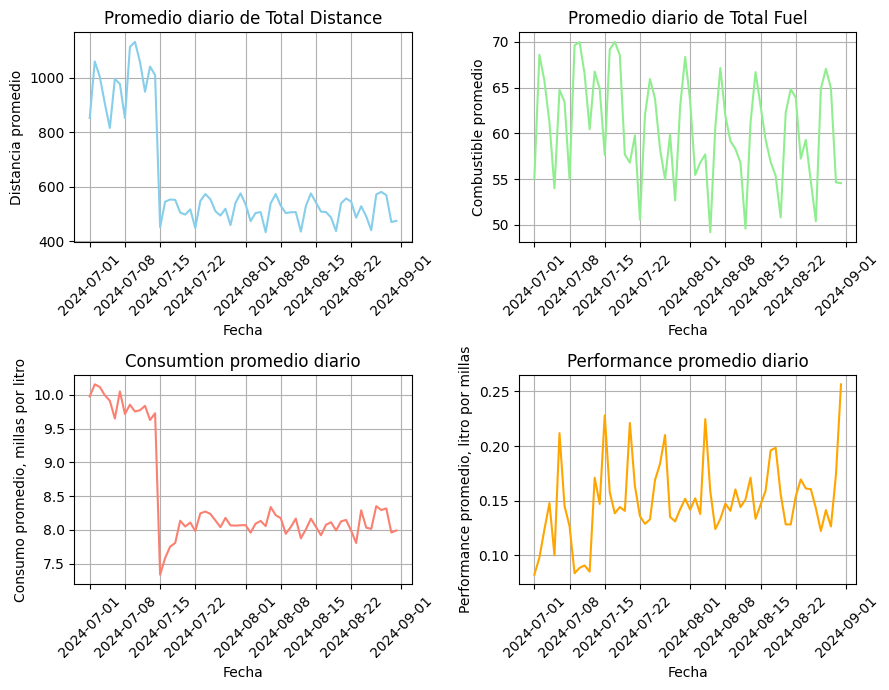

In [ ]:
# Agrupar los datos por día y calcular la media diaria de todas las variables numéricas
df_consumption_daily = df_consumption_limpio.groupby(pd.to_datetime(df_consumption_limpio['date']).dt.date).agg({
    'total_distance_used_sum': 'mean',
    'total_fuel_used_sum': 'mean',
    'consumption': 'mean',
    'performance': 'mean'
})

# Crear una figura con un grid 2x2, usando el eje X como la fecha
plt.figure(figsize=(9, 7))

# Gráfico 1: total_distance_used_sum a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 1)
plt.plot(df_consumption_daily.index, df_consumption_daily['total_distance_used_sum'], color='skyblue', label='Total Distance')
plt.title('Promedio diario de Total Distance')
plt.xlabel('Fecha')
plt.ylabel('Distancia promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 2: total_fuel_used_sum a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 2)
plt.plot(df_consumption_daily.index, df_consumption_daily['total_fuel_used_sum'], color='lightgreen', label='Total Fuel Used')
plt.title('Promedio diario de Total Fuel')
plt.xlabel('Fecha')
plt.ylabel('Combustible promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 3: consumo a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 3)
plt.plot(df_consumption_daily.index, df_consumption_daily['consumption'], color='salmon', label='Consumption')
plt.title('Consumtion promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Consumo promedio, millas por litro')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 4: performance a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 4)
plt.plot(df_consumption_daily.index, df_consumption_daily['performance'], color='orange', label='Performance')
plt.title('Performance promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Performance promedio, litro por millas')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()


**Correlación de datos**

A continuación se hará la matriz de correlación. Como se espera, se observa que hay una correlación positiva y muy fuerte entre el consumo y las millas recorridas, con lo que a mayor distancia recorrida mayor consumo de combustible.

<Figure size 800x600 with 0 Axes>

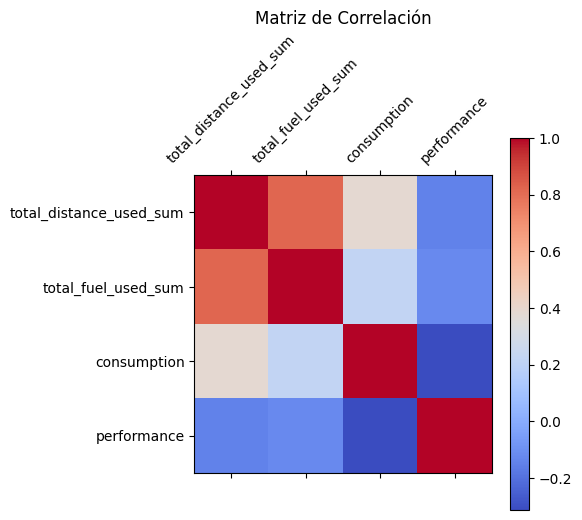

In [ ]:


# Seleccionar las columnas numéricas
numeric_columns = ['total_distance_used_sum', 'total_fuel_used_sum', 'consumption', 'performance']

# Calcular la matriz de correlación
correlation_matrix = df_consumption_limpio[numeric_columns].corr(method='pearson')

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(np.arange(len(numeric_columns)), numeric_columns, rotation=45)
plt.yticks(np.arange(len(numeric_columns)), numeric_columns)
plt.title('Matriz de Correlación')
plt.show()

# Tabla silver_idling

In [ ]:
import pandas as pd

# Ruta al archivo
file = 'silver_idling.csv'

# Leer el archivo
df_idling= pd.read_csv(file)

In [ ]:
df_idling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49825 entries, 0 to 49824
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             49825 non-null  object 
 1   date                  49825 non-null  object 
 2   name                  49825 non-null  object 
 3   distance              49825 non-null  float64
 4   idlingDuration        49825 non-null  object 
 5   idlingPercent         49825 non-null  float64
 6   idlingDuration_hours  49825 non-null  float64
 7   CurrentFuelPrice      49034 non-null  float64
 8   IdlingCost            49825 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.4+ MB


In [ ]:
# Verificar si hay filas duplicadas
duplicate_rows = df_idling[df_idling.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

# Verificar si hay filas con valores en cero
rows_with_zero = df_idling[(df_idling == 0).any(axis=1)]
print("Number of rows with at least one zero value:", len(rows_with_zero))

# Verificar si hay valores faltantes
print("\nMissing Values:")
print(df_idling.isnull().sum())


Number of duplicate rows: 136
Number of rows with at least one zero value: 17002

Missing Values:
unique_id                 0
date                      0
name                      0
distance                  0
idlingDuration            0
idlingPercent             0
idlingDuration_hours      0
CurrentFuelPrice        791
IdlingCost                0
dtype: int64


**Nota importante sobre los datos**
* unique_id:
* name: es un número que identifica el camión. Es un entero pero representa un elemento, es decir, no tiene sentido sacar una estadística numerica como promedios o algo así sino más bien una descriptiva.
* Date: en la fecha en la que se realiza el registro. Es un objeto.
* distance: la distancia recorrida en esa fecha.
* idlingDuration: el tiempo de idling en tiempo.
* idlingPercent: el porcentaje de tiempo de Idling con respecto a todo el tiempo que se manejó y se estuvo en idling.
* idlingDuration_hours: el tiempo de idlingDuration, pero ahora en decimales.
* CurrentFuelPrice: el costo del diesel para cada evento.
* IdlingCost: El total de costo que se tiene por el tiempo que se pasa en idling para ese registro.

Se ha decidido eliminar todas las columnas que no contienen ningún valor, así como aquellas que solo presentan valores cero. Esta medida busca simplificar el conjunto de datos y asegurar que se mantengan únicamente las columnas que aportan información útil para el análisis.

In [ ]:
df_idling.dropna(axis=1, how='all', inplace=True)

In [ ]:
def eliminar_columnas_con_solo_ceros(df):
    # Identificar columnas con solo valores 0
    columnas_con_solo_ceros = df.columns[(df == 0).all()]

    # Eliminar las columnas del DataFrame
    df.drop(columns=columnas_con_solo_ceros, inplace=True)

    # Mostrar las columnas eliminadas
    print("Columnas eliminadas:", columnas_con_solo_ceros.tolist())

    # Mostrar las columnas restantes para verificar
    print("Columnas restantes:", df.columns.tolist())


eliminar_columnas_con_solo_ceros(df_idling)

Columnas eliminadas: []
Columnas restantes: ['unique_id', 'date', 'name', 'distance', 'idlingDuration', 'idlingPercent', 'idlingDuration_hours', 'CurrentFuelPrice', 'IdlingCost']


Vamos a validar y eliminar las columnas que tengan un idlingCost en cero, ya que no aportan a nuestro análisis

In [ ]:
# Eliminar filas donde total_distance_used_sum o total_fuel_used_sum sean igual a cero
df_idling_limpio = df_idling[
    (df_idling['IdlingCost'] != 0)
]

# Eliminar filas con valores nulos
df_idling_limpio = df_idling_limpio.dropna()

# Mostrar el nuevo dataframe limpio
print(df_idling_limpio.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32928 entries, 0 to 49822
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             32928 non-null  object 
 1   date                  32928 non-null  object 
 2   name                  32928 non-null  object 
 3   distance              32928 non-null  float64
 4   idlingDuration        32928 non-null  object 
 5   idlingPercent         32928 non-null  float64
 6   idlingDuration_hours  32928 non-null  float64
 7   CurrentFuelPrice      32928 non-null  float64
 8   IdlingCost            32928 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.5+ MB
None


In [ ]:
df_idling_limpio.head(5)

,unique_id,date,name,distance,idlingDuration,idlingPercent,idlingDuration_hours,CurrentFuelPrice,IdlingCost
0,e1b2b4fa-1533-4745-a280-53be708f986c,2024-07-01,1000,82.230765,05:02:01,49.0,5.03,3.813,19.18
2,a4b72a58-c75c-430f-bfe2-1f2a9cc990bb,2024-07-01,1002,433.584047,03:50:15,34.0,3.84,3.813,14.64
3,9e39272b-4c52-4eec-a712-4244afbb0594,2024-07-01,1003,818.292542,12:02:58,53.0,12.05,3.813,45.95
4,57984b5f-be43-4971-9ee8-e9c3c4cfc344,2024-07-01,1004,540.733262,01:28:24,14.0,1.47,3.813,5.61
5,06cfbeca-1d81-439a-8b46-15a7649c76a0,2024-07-01,1005,202.412740,02:20:36,31.0,2.34,3.813,8.92


Ommitiremos el valor de la columna idlingDuration, ya que es el mismo valor de la columna idlingDuration_hours, solo que sin convertirlo a dato numérico.

In [ ]:
# Lista de variables categóricas
variables_categoricas = ['name', 'date', 'unique_id']

# Lista de variables numéricas
variables_numericas = ['distance', 'idlingDuration_hours', 'CurrentFuelPrice', 'IdlingCost']

### Variables numéricas

In [ ]:
# Obtener estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(df_idling_limpio[variables_numericas].describe())

Estadísticas descriptivas de las variables numéricas:
           distance  idlingDuration_hours  CurrentFuelPrice    IdlingCost
count  32928.000000          32928.000000      32928.000000  32928.000000
mean     406.431405              5.207511          3.775911     19.790860
std      309.916428              5.565356          0.060903     21.163097
min        0.000086              0.010000          3.651000      0.040000
25%      149.643358              0.670000          3.755000      2.510000
50%      372.163791              2.710000          3.768000     10.250000
75%      608.315891              9.690000          3.813000     36.910000
max     1758.667149             23.960000          3.865000     92.370000


El tener un valor muy cercano a cero en la variable idlingDuration_hours e idlingCost indica que ha habido momentos donde el idling es mínimo para la unidad.

Además, podemos notar cuál ha sido el precio mínimo del diésel con 3.651000 y el máximo de 3.865000 para estos dos meses, es importante identificar si hay un pico de aumento del diésel o si en algún momento hay una tendencia para este precio.

### Variables Categóricas

In [ ]:
for column in variables_categoricas:
    print(f"Estadísticas de la variable categórica: {column}")
    print("Frecuencia de valores:")
    print(df_idling_limpio[column].value_counts())  # Frecuencia de cada valor
    print(f"Cantidad de valores únicos: {df_idling[column].nunique()}")  # Número de valores únicos
    print(f"Valor más frecuente: {df_idling_limpio[column].mode()[0]}")  # Valor más común
    print("\n")

Estadísticas de la variable categórica: name
Frecuencia de valores:
name
561     136
655     109
1158     58
832      57
689      56
       ... 
580       1
839       1
1343      1
1340      1
1297      1
Name: count, Length: 875, dtype: int64
Cantidad de valores únicos: 916
Valor más frecuente: 561


Estadísticas de la variable categórica: date
Frecuencia de valores:
date
2024-07-24    1406
2024-07-25    1400
2024-07-26    1338
2024-07-27    1176
2024-07-02     739
2024-07-01     739
2024-07-03     724
2024-07-10     724
2024-07-11     720
2024-07-18     712
2024-07-09     711
2024-07-31     705
2024-07-22     703
2024-07-08     700
2024-07-23     700
2024-07-12     698
2024-07-16     698
2024-08-01     697
2024-07-30     696
2024-07-05     695
2024-07-29     690
2024-07-15     686
2024-07-04     678
2024-07-20     660
2024-07-06     651
2024-07-13     650
2024-07-21     604
2024-07-14     598
2024-07-07     578
2024-08-28     464
2024-08-29     459
2024-08-27     451
2024-08-30     4

De igual forma que con la tabla consumption, debemos de revisar si para pasos más adelantes es necesario dejar los camiones que solo tienen un registro o decidir por eliminar estos registros.

De igual forma, debemos atacar estos valores únicos de unique_id que salen repetidos, ya que podría deberse a un caso de duplicados de datos o que la tarea que se ejecuta diariamente se haya ejecutado más de una vez para esos días.

In [ ]:
# Calcular la cardinalidad de las variables categóricas
cardinalidad_name = df_idling_limpio['name'].nunique()
cardinalidad_date = df_idling_limpio['date'].nunique()

# Crear un diccionario con las cardinalidades
cardinalidad_categoricas = {
    'name': cardinalidad_name,
    'date': cardinalidad_date
}

cardinalidad_categoricas

{'name': 875, 'date': 58}

## Distribución de las variables numéricas

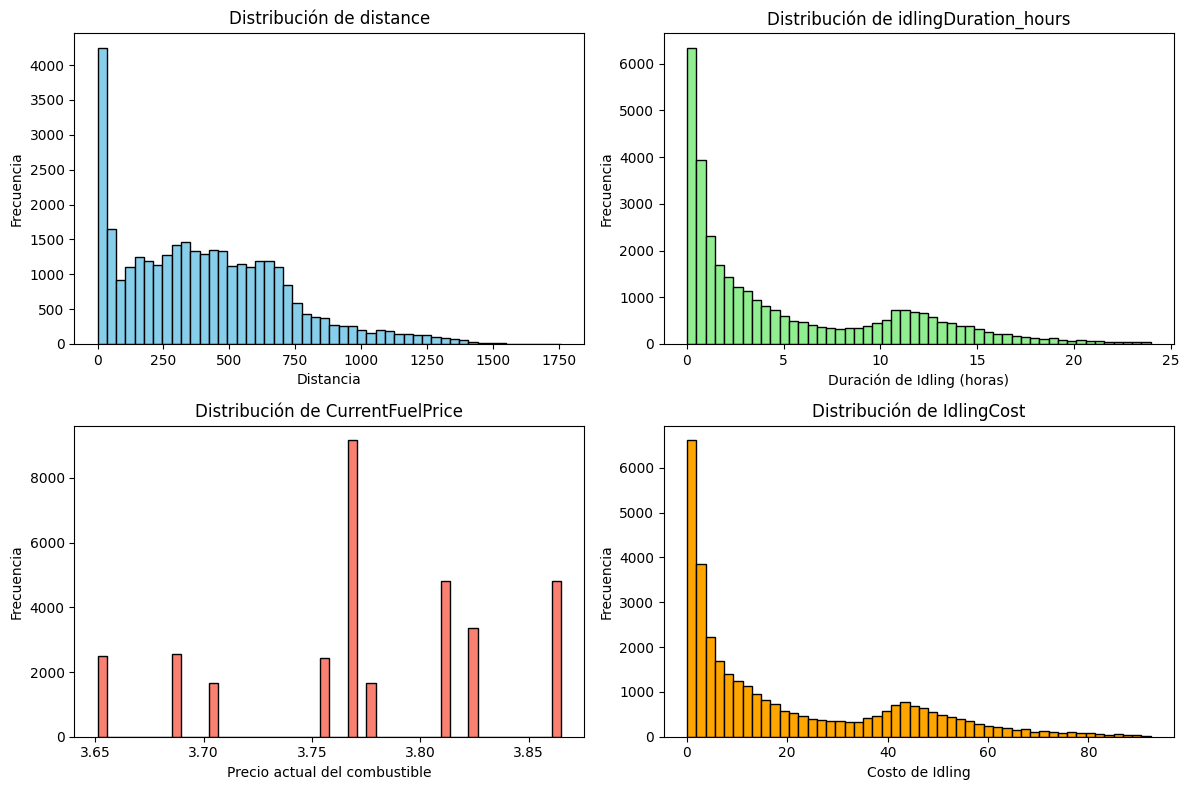

In [ ]:
# Crear una figura con un grid de 2x2 para las distribuciones de las cuatro variables numéricas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Subplot 1: distance
plt.subplot(2, 2, 1)
plt.hist(df_idling_limpio['distance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de distance')
plt.xlabel('Distancia')
plt.ylabel('Frecuencia')

# Subplot 2: idlingDuration_hours
plt.subplot(2, 2, 2)
plt.hist(df_idling_limpio['idlingDuration_hours'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de idlingDuration_hours')
plt.xlabel('Duración de Idling (horas)')
plt.ylabel('Frecuencia')

# Subplot 3: CurrentFuelPrice
plt.subplot(2, 2, 3)
plt.hist(df_idling_limpio['CurrentFuelPrice'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribución de CurrentFuelPrice')
plt.xlabel('Precio actual del combustible')
plt.ylabel('Frecuencia')

# Subplot 4: IdlingCost
plt.subplot(2, 2, 4)
plt.hist(df_idling_limpio['IdlingCost'], bins=50, color='orange', edgecolor='black')
plt.title('Distribución de IdlingCost')
plt.xlabel('Costo de Idling')
plt.ylabel('Frecuencia')

# Ajustar los subplots
plt.tight_layout()
plt.show()


Notamos una distribución muy pegada a los datos en cero, eso quiere decir que esos valores pequeños podrían estar alterando la distribución normal de los datos. Antes de hacer alguna transformación, es importante realizar una identificación y eliminación de estos outliers.

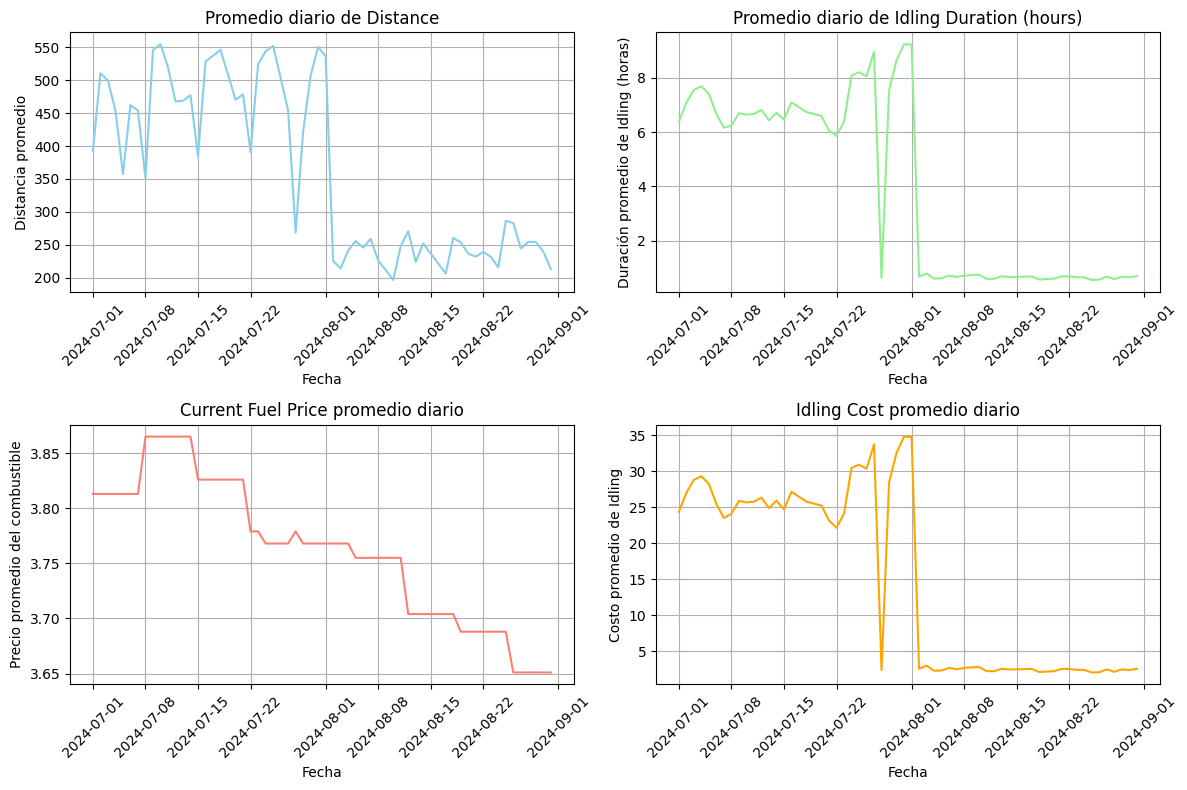

In [ ]:

# Agrupar los datos por día y calcular la media diaria de todas las variables numéricas
df_idling_daily = df_idling_limpio.groupby(pd.to_datetime(df_idling_limpio['date']).dt.date).agg({
    'distance': 'mean',
    'idlingDuration_hours': 'mean',
    'CurrentFuelPrice': 'mean',
    'IdlingCost': 'mean'
})

# Crear una figura con un grid 2x2, usando el eje X como la fecha
plt.figure(figsize=(12, 8))

# Gráfico 1: distance a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 1)
plt.plot(df_idling_daily.index, df_idling_daily['distance'], color='skyblue', label='Distance')
plt.title('Promedio diario de Distance')
plt.xlabel('Fecha')
plt.ylabel('Distancia promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 2: idlingDuration_hours a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 2)
plt.plot(df_idling_daily.index, df_idling_daily['idlingDuration_hours'], color='lightgreen', label='Idling Duration (hours)')
plt.title('Promedio diario de Idling Duration (hours)')
plt.xlabel('Fecha')
plt.ylabel('Duración promedio de Idling (horas)')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 3: CurrentFuelPrice a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 3)
plt.plot(df_idling_daily.index, df_idling_daily['CurrentFuelPrice'], color='salmon', label='Current Fuel Price')
plt.title('Current Fuel Price promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio del combustible')
plt.xticks(rotation=45)
plt.grid(True)

# Gráfico 4: IdlingCost a lo largo del tiempo (promedio diario)
plt.subplot(2, 2, 4)
plt.plot(df_idling_daily.index, df_idling_daily['IdlingCost'], color='orange', label='Idling Cost')
plt.title('Idling Cost promedio diario')
plt.xlabel('Fecha')
plt.ylabel('Costo promedio de Idling')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Matriz de Correlación

<Figure size 800x600 with 0 Axes>

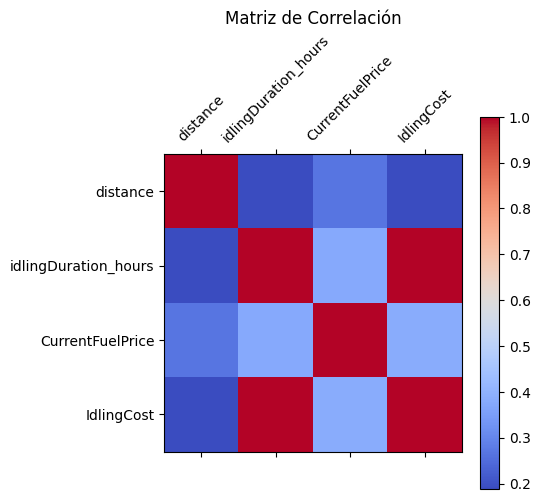

In [ ]:

import numpy as np
# Seleccionar las columnas numéricas
numeric_columns = ['distance', 'idlingDuration_hours', 'CurrentFuelPrice', 'IdlingCost']

# Calcular la matriz de correlación
correlation_matrix = df_idling_limpio[numeric_columns].corr(method='pearson')

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(np.arange(len(numeric_columns)), numeric_columns, rotation=45)
plt.yticks(np.arange(len(numeric_columns)), numeric_columns)
plt.title('Matriz de Correlación')
plt.show()


# Tabla bronze_safety

In [ ]:
# Ruta al archivo
file = 'bronze_safety.csv'

# Leer el archivo
df_safety= pd.read_csv(file)

<ipython-input-30-770741bb827e>:5: DtypeWarning: Columns (21,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_safety= pd.read_csv(file)


In [ ]:
df_safety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84828 entries, 0 to 84827
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   DeviceName                            84827 non-null  object 
 1   DeviceId                              84828 non-null  object 
 2   DeviceComment                         20938 non-null  object 
 3   DeviceGroup                           84828 non-null  object 
 4   DeviceGroup|Company Group             84828 non-null  object 
 5   UserFirstName                         0 non-null      float64
 6   UserLastName                          0 non-null      float64
 7   UserName                              0 non-null      float64
 8   UserId                                0 non-null      float64
 9   UserComment                           0 non-null      float64
 10  DriverGroup                           0 non-null      float64
 11  GroupName      

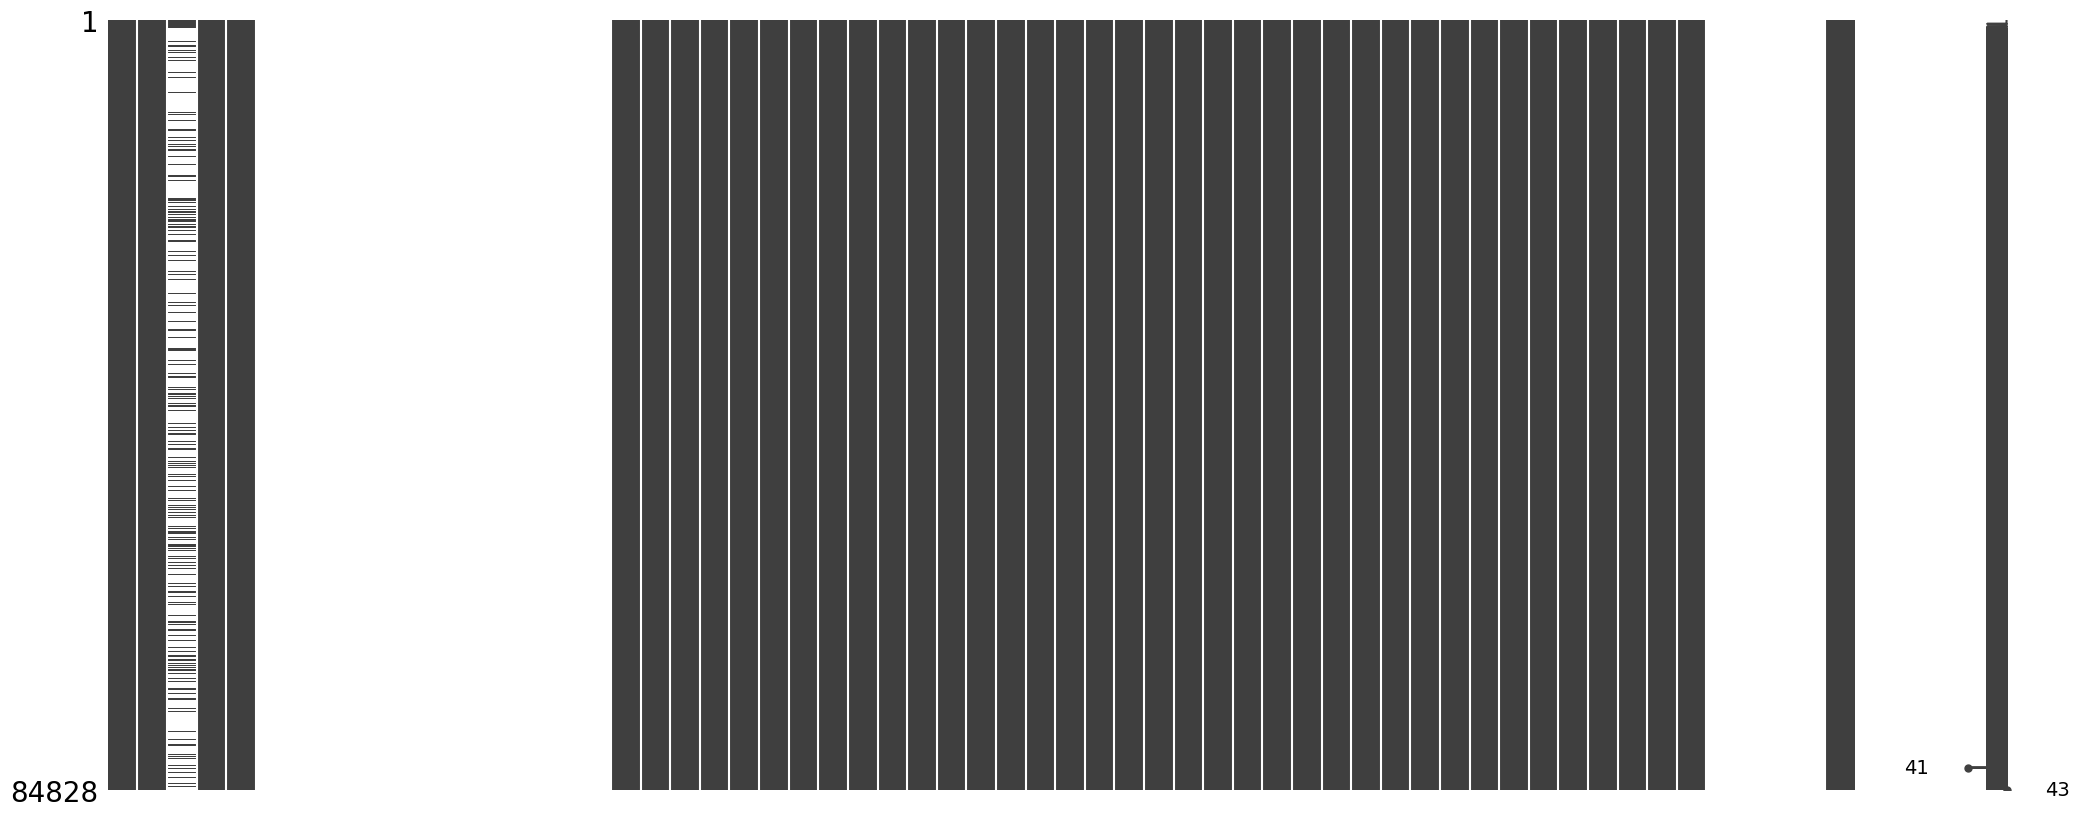

In [ ]:
import missingno as msno
#Visualizar la falta de datos
msno.matrix(df_safety)
plt.show()

¿Existen valores faltantes en el conjunto de datos? ¿Es posible identificar patrones de ausencia?

Sí, hay columnas en el conjunto de datos que están completamente vacías, y la columna 'DeviceComment' presenta una cantidad significativa de valores faltantes.

Se ha decidido eliminar todas las columnas que no contienen ningún valor, así como aquellas que solo presentan valores cero. Esta medida busca simplificar el conjunto de datos y asegurar que se mantengan únicamente las columnas que aportan información útil para el análisis.

In [ ]:
df_safety.dropna(axis=1, how='all', inplace=True)

### Función eliminar_columnas_con_solo_ceros

La función eliminar_columnas_con_solo_ceros() tiene como propósito limpiar el DataFrame eliminando las columnas que no aportan información útil, ya que contienen exclusivamente valores de cero. Esto optimiza el análisis al eliminar datos irrelevantes, reduciendo la dimensionalidad del conjunto de datos.

In [ ]:
def eliminar_columnas_con_solo_ceros(df):
    # Identificar columnas con solo valores 0
    columnas_con_solo_ceros = df.columns[(df == 0).all()]

    # Eliminar las columnas del DataFrame
    df.drop(columns=columnas_con_solo_ceros, inplace=True)

    # Mostrar las columnas eliminadas
    print("Columnas eliminadas:", columnas_con_solo_ceros.tolist())

    # Mostrar las columnas restantes para verificar
    print("Columnas restantes:", df.columns.tolist())


eliminar_columnas_con_solo_ceros(df_safety)

Columnas eliminadas: ['RiskManagementAux1']
Columnas restantes: ['DeviceName', 'DeviceId', 'DeviceComment', 'DeviceGroup', 'DeviceGroup|Company Group', 'RiskManagementSpeedLimit1Count', 'RiskManagementSpeedLimit2Count', 'RiskManagementSpeedLimit3Count', 'RiskManagementTotalDrivingDuration', 'RiskManagementAverageSpeed', 'RiskManagementStopUnder10Count', 'RiskManagementStopOver10Count', 'RiskManagementStopOver20Count', 'RiskManagementStopOver30Count', 'RiskManagementStopOver40Count', 'RiskManagementStopOver50Count', 'RiskManagementIdlingOver5Count', 'RiskManagementIdlingDuration', 'RiskManagementAfterHoursTripCount', 'RiskManagementTotalDistance', 'RiskManagementTotalStopsCount', 'RiskManagementExceptionRule1', 'RiskManagementExceptionRule1Duration', 'RiskManagementExceptionRule1Count', 'RiskManagementExceptionRule1Distance', 'RiskManagementExceptionRule2', 'RiskManagementExceptionRule2Duration', 'RiskManagementExceptionRule2Count', 'RiskManagementExceptionRule2Distance', 'RiskManagemen

### Estadísticas descriptivas

In [ ]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df_safety.describe(include='all').T


Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DeviceName,84827,9281,5540,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceId,84828,84828,b5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceComment,20938,5621,Errordetableta,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceGroup,84828,411,"Trailer, DRIVER MANAGER LEONARDO RORIGUEZ",3785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceGroup|Company Group,84828,411,"DRIVER MANAGER LEONARDO RORIGUEZ, Trailer",3785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RiskManagementSpeedLimit1Count,84828.0,NaN,NaN,NaN,11.842316,150.875792,0.0,0.0,0.0,0.0,8374.0
RiskManagementSpeedLimit2Count,84828.0,NaN,NaN,NaN,0.048569,1.055622,0.0,0.0,0.0,0.0,85.0
RiskManagementSpeedLimit3Count,84828.0,NaN,NaN,NaN,0.000448,0.02569,0.0,0.0,0.0,0.0,3.0
RiskManagementTotalDrivingDuration,84828,893,0:00,83920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RiskManagementAverageSpeed,84828.0,163.0,0.0,68444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminar columnas sin información útil para el modelo
Eliminar las columnas 'DeviceComment', 'DeviceGroup', 'DeviceGroup|Company Group' del DataFrame utilizando el argumento inplace.

In [ ]:
# Eliminar las columnas especificadas de df_safety.
df_safety.drop(columns=['DeviceComment', 'DeviceGroup', 'DeviceGroup|Company Group', 'DeviceGroup'], inplace=True)

## Reglas de excepciones de gestión de riesgos



El conjunto de datos registra las excepciones generadas por la violación de varias reglas. En particular, se incluyen cinco reglas clave relacionadas con la gestión de riesgos:

- RiskManagementExceptionRule1: SPEEDING (Exceso de velocidad),
- RiskManagementExceptionRule2: Excessive Speeding (Velocidad extremadamente alta),
- RiskManagementExceptionRule3: Hard Acceleration (Aceleración brusca),
- RiskManagementExceptionRule4: Harsh Braking (Frenado brusco),
- RiskManagementExceptionRule5: Harsh Cornering (Curvas cerradas).

Las columnas con el prefijo RiskManagementExceptionRule seguido de un número, indican el nombre de la regla asociada a eventos específicos, para los cuales se registran su frecuencia, la distancia recorrida y la duración de la ocurrencia.

Dado que los nombres de estas reglas son etiquetas repetitivas en todas las filas de sus respectivas columnas, no aportan información adicional al análisis. Por ello, se eliminarán estas columnas para mejorar la claridad y facilitar el proceso de análisis de datos.



In [ ]:
# Lista de nombres de las columnas a eliminar
columnas_a_eliminar = [f'RiskManagementExceptionRule{i}' for i in range(1, 6)]

# Eliminar las columnas del DataFrame
df_safety.drop(columns=columnas_a_eliminar, inplace=True)

En este análisis de datos, se ha decidido cambiar los nombres de las columnas que hacen referencia a reglas de excepciones de gestión de riesgos para facilitar la interpretación y el análisis de los datos. Las columnas cuyos nombres comenzaban con "RiskManagementExceptionRuleX" han sido renombradas utilizando descripciones más intuitivas y específicas que reflejan con mayor precisión el contenido de cada columna.

Por ejemplo, las columnas asociadas con "RiskManagementExceptionRule1" han sido renombradas de la siguiente manera:

- RiskManagementExceptionRule1Duration se ha cambiado a SpeedingDuration, que indica la duración de los eventos relacionados con exceso de velocidad.
- RiskManagementExceptionRule1Count se ha cambiado a SpeedingCount, que refleja el conteo de estos eventos.
- RiskManagementExceptionRule1Distance se ha cambiado a SpeedingDistance, que representa la distancia recorrida durante dichos eventos.


Este mismo principio se aplica a las reglas subsiguientes:

- RiskManagementExceptionRule2 se ha renombrado para reflejar eventos de Excessive Speeding (Exceso de velocidad).
- RiskManagementExceptionRule3 se ha renombrado para describir eventos de Hard Acceleration (Aceleración brusca).
- RiskManagementExceptionRule4 se ha renombrado para reflejar eventos de Harsh Braking (Frenado brusco).
- RiskManagementExceptionRule5 se ha renombrado para representar eventos de Harsh Cornering (Giro brusco).


Estos cambios no solo hacen más claras las descripciones de los datos sino que también mejoran la capacidad para realizar un análisis más eficiente y preciso, al hacer que el significado de cada columna sea más evidente de inmediato para los analistas y cualquier otra persona que trabaje con el conjunto de datos.

In [ ]:
# Diccionario con los nombres originales y los nuevos nombres
columnas_reemplazo = {
    'RiskManagementExceptionRule1Duration': 'SpeedingDuration',
    'RiskManagementExceptionRule1Count': 'SpeedingCount',
    'RiskManagementExceptionRule1Distance': 'SpeedingDistance',
    'RiskManagementExceptionRule2Duration': 'ExcessiveSpeedingDuration',
    'RiskManagementExceptionRule2Count': 'ExcessiveSpeedingCount',
    'RiskManagementExceptionRule2Distance': 'ExcessiveSpeedingDistance',
    'RiskManagementExceptionRule3Duration': 'HardAccelerationDuration',
    'RiskManagementExceptionRule3Count': 'HardAccelerationCount',
    'RiskManagementExceptionRule3Distance': 'HardAccelerationDistance',
    'RiskManagementExceptionRule4Duration': 'HarshBrakingDuration',
    'RiskManagementExceptionRule4Count': 'HarshBrakingCount',
    'RiskManagementExceptionRule4Distance': 'HarshBrakingDistance',
    'RiskManagementExceptionRule5Duration': 'HarshCorneringDuration',
    'RiskManagementExceptionRule5Count': 'HarshCorneringCount',
    'RiskManagementExceptionRule5Distance': 'HarshCorneringDistance'
}

# Reemplazar los nombres de las columnas en el DataFrame
df_safety.rename(columns=columnas_reemplazo, inplace=True)

## Cambios en el nombre de las columnas

El propósito de eliminar el prefijo 'RiskManagement' de los nombres de las columnas es mejorar la legibilidad y simplicidad del DataFrame, haciéndolo más manejable para su análisis y uso posterior. En su estado actual, los nombres de las columnas son redundantes y extensos, lo que dificulta el trabajo con el DataFrame, especialmente en procesos de análisis, manipulación y visualización de datos.

In [ ]:
# Eliminar el prefijo 'RiskManagement' del nombre de las columnas
df_safety.columns = [col.replace('RiskManagement', '') if col.startswith('RiskManagement') else col for col in df_safety.columns]

## Limpieza de columnas no numéricas



In [ ]:
# Seleccionar las columnas que no son de tipo numérico
columnas_no_numericas = df_safety.select_dtypes(exclude=['number']).columns

# Imprimir los nombres de las columnas no numéricas
print(columnas_no_numericas)

Index(['DeviceName', 'DeviceId', 'TotalDrivingDuration', 'AverageSpeed',
       'IdlingDuration', 'TotalStopsCount', 'SpeedingDuration',
       'ExcessiveSpeedingDuration', 'HardAccelerationDuration',
       'HarshBrakingDuration', 'HarshCorneringDuration'],
      dtype='object')


## TotalDrivingDuration

Esta función, print_non_numeric_values(), está diseñada para identificar e imprimir los valores no numéricos presentes en una columna específica de un DataFrame de pandas.

Propósito:
El objetivo principal es verificar una columna del DataFrame en busca de valores que no sean numéricos y mostrarlos al usuario.

Este proceso es útil para depurar y asegurarse de que una columna que debería ser numérica no contenga valores incorrectos o inválidos.

In [ ]:
def print_non_numeric_values(df, column_name):
    """
    Identifica e imprime valores no numéricos de una columna especificada en un DataFrame de pandas.

    Esta función verifica la columna especificada de un DataFrame en busca de valores no numéricos.
    Utiliza la función `pd.to_numeric()` para intentar convertir los valores de la columna a numéricos.
    Los valores no numéricos que no se pueden convertir son identificados e impresos.
    """

    # Intenta convertir la columna a numérico, estableciendo errores en 'coerce' para manejar valores no numéricos
    numeric_values = pd.to_numeric(df[column_name], errors='coerce')

    # Crea una máscara para los valores no numéricos
    non_numeric_mask = numeric_values.isna()

    # Filtra e imprime los valores no numéricos, excluyendo NaN
    non_numeric_values = df[non_numeric_mask][column_name]
    print(non_numeric_values[non_numeric_values.notna()])

In [ ]:
print_non_numeric_values(df_safety, 'TotalDrivingDuration')

0         73:26
1         58:54
2        193:59
3        496:27
4        260:58
          ...  
84823      0:00
84824      0:00
84825      0:00
84826      0:00
84827      0:00
Name: TotalDrivingDuration, Length: 84828, dtype: object


### Función convertir_a_segundos

La función, convertir_a_segundos(), convierte una cadena de texto que representa un intervalo de tiempo en formato de horas y minutos (e.g., "HH
") a un valor numérico en segundos.

Separación de componentes:
La función toma una cadena de tiempo en formato "HH:mm", la separa en dos partes (horas y minutos) usando el carácter : como delimitador, y convierte ambas partes en enteros.

Este proceso permite trabajar con el tiempo de conducción en una unidad uniforme (segundos), facilitando cálculos y análisis posteriores.

In [ ]:
def convertir_a_segundos(tiempo):
    # Separar las horas y los minutos usando el separador ":"
    parte1, parte2 = map(int, tiempo.split(':'))

    # Convertir la primera parte (horas) a segundos y sumar la segunda parte (minutos) convertida a segundos
    segundos = (parte1 * 60) + parte2  # Ajustado a minutos
    return segundos

# Aplicar la función convertir_a_segundos a la columna 'lDrivingDuration'
df_safety['TotalDrivingDuration'] = df_safety['TotalDrivingDuration'].apply(convertir_a_segundos)


In [ ]:
print_non_numeric_values(df_safety, 'TotalDrivingDuration')

Series([], Name: TotalDrivingDuration, dtype: int64)


## AverageSpeed

In [ ]:
print_non_numeric_values(df_safety, 'AverageSpeed')

140    8,854.3
Name: AverageSpeed, dtype: object


### Función replace_comas

La función replace_comas() está diseñada para eliminar las comas en los valores de una columna específica de un DataFrame de pandas. Esto es útil cuando se tienen datos numéricos representados como cadenas de texto con comas (por ejemplo, "1,000" en lugar de "1000").

Propósito:
La función busca limpiar los datos en la columna indicada, eliminando las comas para facilitar su conversión a un formato numérico u otro procesamiento adicional.


Esta función es útil para limpiar datos que provienen de fuentes donde los números se formatean con comas, comúnmente en informes financieros o grandes cantidades.

In [ ]:
def replace_comas(df, nombre_columna):
    """
    Reemplaza las comas en la columna especificada de un DataFrame de pandas.

    Esta función modifica la columna indicada, eliminando las comas para preparar los datos
    para una posible conversión a un formato numérico.

    """

    # Reemplazar las comas por una cadena vacía
    df[nombre_columna] = df[nombre_columna].str.replace(',', '')

replace_comas(df_safety, 'AverageSpeed')

In [ ]:
print_non_numeric_values(df_safety, 'AverageSpeed')

Series([], Name: AverageSpeed, dtype: object)


In [ ]:
# Convertir una columna específica no numérica a numérica
df_safety['AverageSpeed'] = pd.to_numeric(df_safety['AverageSpeed'], errors='coerce')

## IdlingDuration

In [ ]:
print_non_numeric_values(df_safety, 'IdlingDuration')

0        117:07
1        118:51
2        272:13
3        648:34
4        582:46
          ...  
84823      0:00
84824      0:00
84825      0:00
84826      0:00
84827      0:00
Name: IdlingDuration, Length: 84828, dtype: object


In [ ]:
# Aplicar la función convertir_a_segundos a la columna 'IdlingDuration'
df_safety['IdlingDuration'] = df_safety['IdlingDuration'].apply(convertir_a_segundos)

In [ ]:
print_non_numeric_values(df_safety, 'IdlingDuration')

Series([], Name: IdlingDuration, dtype: int64)


## TotalStopsCount

In [ ]:
print_non_numeric_values(df_safety, 'TotalStopsCount')

16     1,331
28     1,114
36     1,258
576    1,015
591    1,174
Name: TotalStopsCount, dtype: object


In [ ]:
replace_comas(df_safety, 'TotalStopsCount')

In [ ]:
print_non_numeric_values(df_safety, 'TotalStopsCount')

Series([], Name: TotalStopsCount, dtype: object)


In [ ]:
# Convertir una columna específica no numérica a numérica
df_safety['TotalStopsCount'] = pd.to_numeric(df_safety['TotalStopsCount'], errors='coerce')

## Convertir a segundos Rules Durations

A continuación, se convierten a segundos todas las columnas que registran las duraciones de los eventos de riesgo asociados con las cinco reglas de gestión de riesgos:

In [ ]:
# Aplicar la función convertir_a_segundos a la columna 'SpeedingDuration'
df_safety['SpeedingDuration'] = df_safety['SpeedingDuration'].apply(convertir_a_segundos)

In [ ]:
print_non_numeric_values(df_safety, 'SpeedingDuration')

Series([], Name: SpeedingDuration, dtype: int64)


In [ ]:
# Aplicar la función convertir_a_segundos a la columna 'ExcessiveSpeedingDuration'
df_safety['ExcessiveSpeedingDuration'] = df_safety['ExcessiveSpeedingDuration'].apply(convertir_a_segundos)

In [ ]:
print_non_numeric_values(df_safety, 'ExcessiveSpeedingDuration')

Series([], Name: ExcessiveSpeedingDuration, dtype: int64)


In [ ]:
# Aplicar la función convertir_a_segundos a la columna 'HardAccelerationDuration'
df_safety['HardAccelerationDuration'] = df_safety['HardAccelerationDuration'].apply(convertir_a_segundos)

In [ ]:
print_non_numeric_values(df_safety, 'HardAccelerationDuration')

Series([], Name: HardAccelerationDuration, dtype: int64)


In [ ]:
# Aplicar la función convertir_a_segundos a la columna 'HarshBrakingDuration'
df_safety['HarshBrakingDuration'] = df_safety['HarshBrakingDuration'].apply(convertir_a_segundos)

In [ ]:
print_non_numeric_values(df_safety, 'HarshBrakingDuration')

Series([], Name: HarshBrakingDuration, dtype: int64)


In [ ]:
# Aplicar la función convertir_a_segundos a la columna 'HarshCorneringDuration'
df_safety['HarshCorneringDuration'] = df_safety['HarshCorneringDuration'].apply(convertir_a_segundos)

In [ ]:
print_non_numeric_values(df_safety, 'HarshCorneringDuration')

Series([], Name: HarshCorneringDuration, dtype: int64)


### Eliminar columnas con loso ceros después de la limpieza de columnas

Tras el proceso de limpieza de datos, es común encontrar columnas que, debido a la transformación o depuración de los valores, han quedado compuestas exclusivamente por ceros. Estas columnas no aportan información relevante al análisis y pueden generar ruido en los resultados. Por ello, se procederá a eliminar todas aquellas columnas que contengan únicamente valores de cero, optimizando así la estructura del conjunto de datos y facilitando un análisis más eficiente.

In [ ]:

eliminar_columnas_con_solo_ceros(df_safety)

Columnas eliminadas: ['HardAccelerationDuration', 'HarshBrakingDuration']
Columnas restantes: ['DeviceName', 'DeviceId', 'SpeedLimit1Count', 'SpeedLimit2Count', 'SpeedLimit3Count', 'TotalDrivingDuration', 'AverageSpeed', 'StopUnder10Count', 'StopOver10Count', 'StopOver20Count', 'StopOver30Count', 'StopOver40Count', 'StopOver50Count', 'IdlingOver5Count', 'IdlingDuration', 'AfterHoursTripCount', 'TotalDistance', 'TotalStopsCount', 'SpeedingDuration', 'SpeedingCount', 'SpeedingDistance', 'ExcessiveSpeedingDuration', 'ExcessiveSpeedingCount', 'ExcessiveSpeedingDistance', 'HardAccelerationCount', 'HardAccelerationDistance', 'HarshBrakingCount', 'HarshBrakingDistance', 'HarshCorneringDuration', 'HarshCorneringCount', 'HarshCorneringDistance', 'MaxSpeed']


# EDA DataSet df_safety

In [ ]:
df_safety.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DeviceName,84827,9281,5540,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceId,84828,84828,b5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SpeedLimit1Count,84828.0,NaN,NaN,NaN,11.842316,150.875792,0.0,0.0,0.0,0.0,8374.0
SpeedLimit2Count,84828.0,NaN,NaN,NaN,0.048569,1.055622,0.0,0.0,0.0,0.0,85.0
SpeedLimit3Count,84828.0,NaN,NaN,NaN,0.000448,0.02569,0.0,0.0,0.0,0.0,3.0
TotalDrivingDuration,84828.0,NaN,NaN,NaN,278.877788,2930.888915,0.0,0.0,0.0,0.0,52617.0
AverageSpeed,16384.0,NaN,NaN,NaN,3.460925,70.232288,0.0,0.0,0.0,0.0,8854.3
StopUnder10Count,84828.0,NaN,NaN,NaN,2.298958,24.549934,0.0,0.0,0.0,0.0,1058.0
StopOver10Count,84828.0,NaN,NaN,NaN,0.871634,9.136239,0.0,0.0,0.0,0.0,172.0
StopOver20Count,84828.0,NaN,NaN,NaN,0.346419,3.67105,0.0,0.0,0.0,0.0,86.0


## ¿Cuáles son las estadísticas resumidas del conjunto de datos?

Este análisis describe un conjunto de datos con estadísticas descriptivas, destacando información clave para cada columna en el DataFrame. A continuación se ofrece un resumen de cada sección y sus principales observaciones:

#### **DeviceName y DeviceId:**

- DeviceName: Tiene 84,827 registros con 9,281 valores únicos, lo que sugiere una gran variedad de dispositivos. El dispositivo más frecuente aparece 52 veces, lo que indica algunos dispositivos se repiten con frecuencia.

 - DeviceId: Cada registro tiene un identificador único (84,828 registros únicos), lo que asegura que cada entrada está vinculada a un dispositivo distinto.


#### **Conteo de eventos por límites de velocidad (SpeedLimit1Count, SpeedLimit2Count, SpeedLimit3Count):**

Las columnas relacionadas con los eventos de límites de velocidad muestran valores con muchas observaciones que son cero, como se puede deducir de los percentiles. En SpeedLimit1Count, aunque el valor promedio es 11.84, el 75% de los registros tienen un valor de 0, lo que indica que la mayoría de los eventos tienen una baja frecuencia o no se registran.

#### **Duraciones y velocidades medias (TotalDrivingDuration, AverageSpeed):**

- TotalDrivingDuration: La duración promedio es de 278.88 segundos, con una desviación estándar alta (2,930.89), lo que indica variabilidad significativa entre los eventos.
- AverageSpeed: Solo 16,384 de los 84,828 registros tienen valores, con una velocidad promedio de 3.46, aunque nuevamente, la mayoría de los registros (75%) son cero.

#### **Paradas (Stops) y ralentí (Idling):**

Las columnas relacionadas con las paradas (por debajo o por encima de ciertos tiempos) tienen valores promedio bajos, indicando que estos eventos son relativamente infrecuentes. El valor más alto en cualquier categoría es de 1058 para StopUnder10Count, pero la mayoría de los percentiles (hasta el 75%) siguen siendo ceros.

IdlingOver5Count y IdlingDuration muestran que el ralentí es más común, con promedios de 3.51 y 316.27, respectivamente, aunque siguen teniendo una gran cantidad de registros en cero.

#### **Distancias totales (TotalDistance) y excesos de velocidad (Speeding):**

- TotalDistance: La distancia promedio es de 255.48, pero la mayoría de los registros tienen un valor de 0, lo que indica que en muchos casos no se registra una distancia significativa.

#### **Eventos de exceso de velocidad (SpeedingDuration, SpeedingCount, ExcessiveSpeedingDuration)**

Las columnas de eventos de exceso de velocidad (SpeedingDuration, SpeedingCount, ExcessiveSpeedingDuration)
Muestran que estos eventos son bastante raros, ya que los percentiles 50% y 75% son 0, aunque los valores máximos pueden ser relativamente altos.

#### **Aceleración y frenado brusco (HardAcceleration, HarshBraking):**

Las ocurrencias de aceleración y frenado brusco son muy poco comunes, con valores promedio cercanos a cero, y con un máximo de 349 eventos para aceleración brusca. La mayor parte de los registros tiene estos valores en cero.

#### **Curvas bruscas (HarshCornering):**

Tanto las duraciones como los conteos de eventos de curvas bruscas son raros. La mayoría de los registros no tienen eventos, y el promedio de ocurrencias es bajo (0.439).

#### **Velocidad máxima (MaxSpeed):**

Aunque la mayoría de los registros tiene un valor de cero, la velocidad máxima puede llegar hasta 100.66 en algunos casos, lo que podría indicar eventos aislados de altas velocidades.

### **Conclusiones:**
- Datos escasos: Muchas columnas contienen valores principalmente en cero, lo que sugiere que la mayoría de los eventos no ocurrieron o no fueron registrados.
- Eventos raros: Aceleraciones bruscas, frenados bruscos y excesos de velocidad son eventos que ocurren rara vez, como lo indican las bajas frecuencias y valores promedio.
- Distribución desigual: La alta desviación estándar en varias columnas sugiere una gran variabilidad entre los registros, con unos pocos valores altos que influyen en el promedio.

## ¿Hay correlación entre las variables?

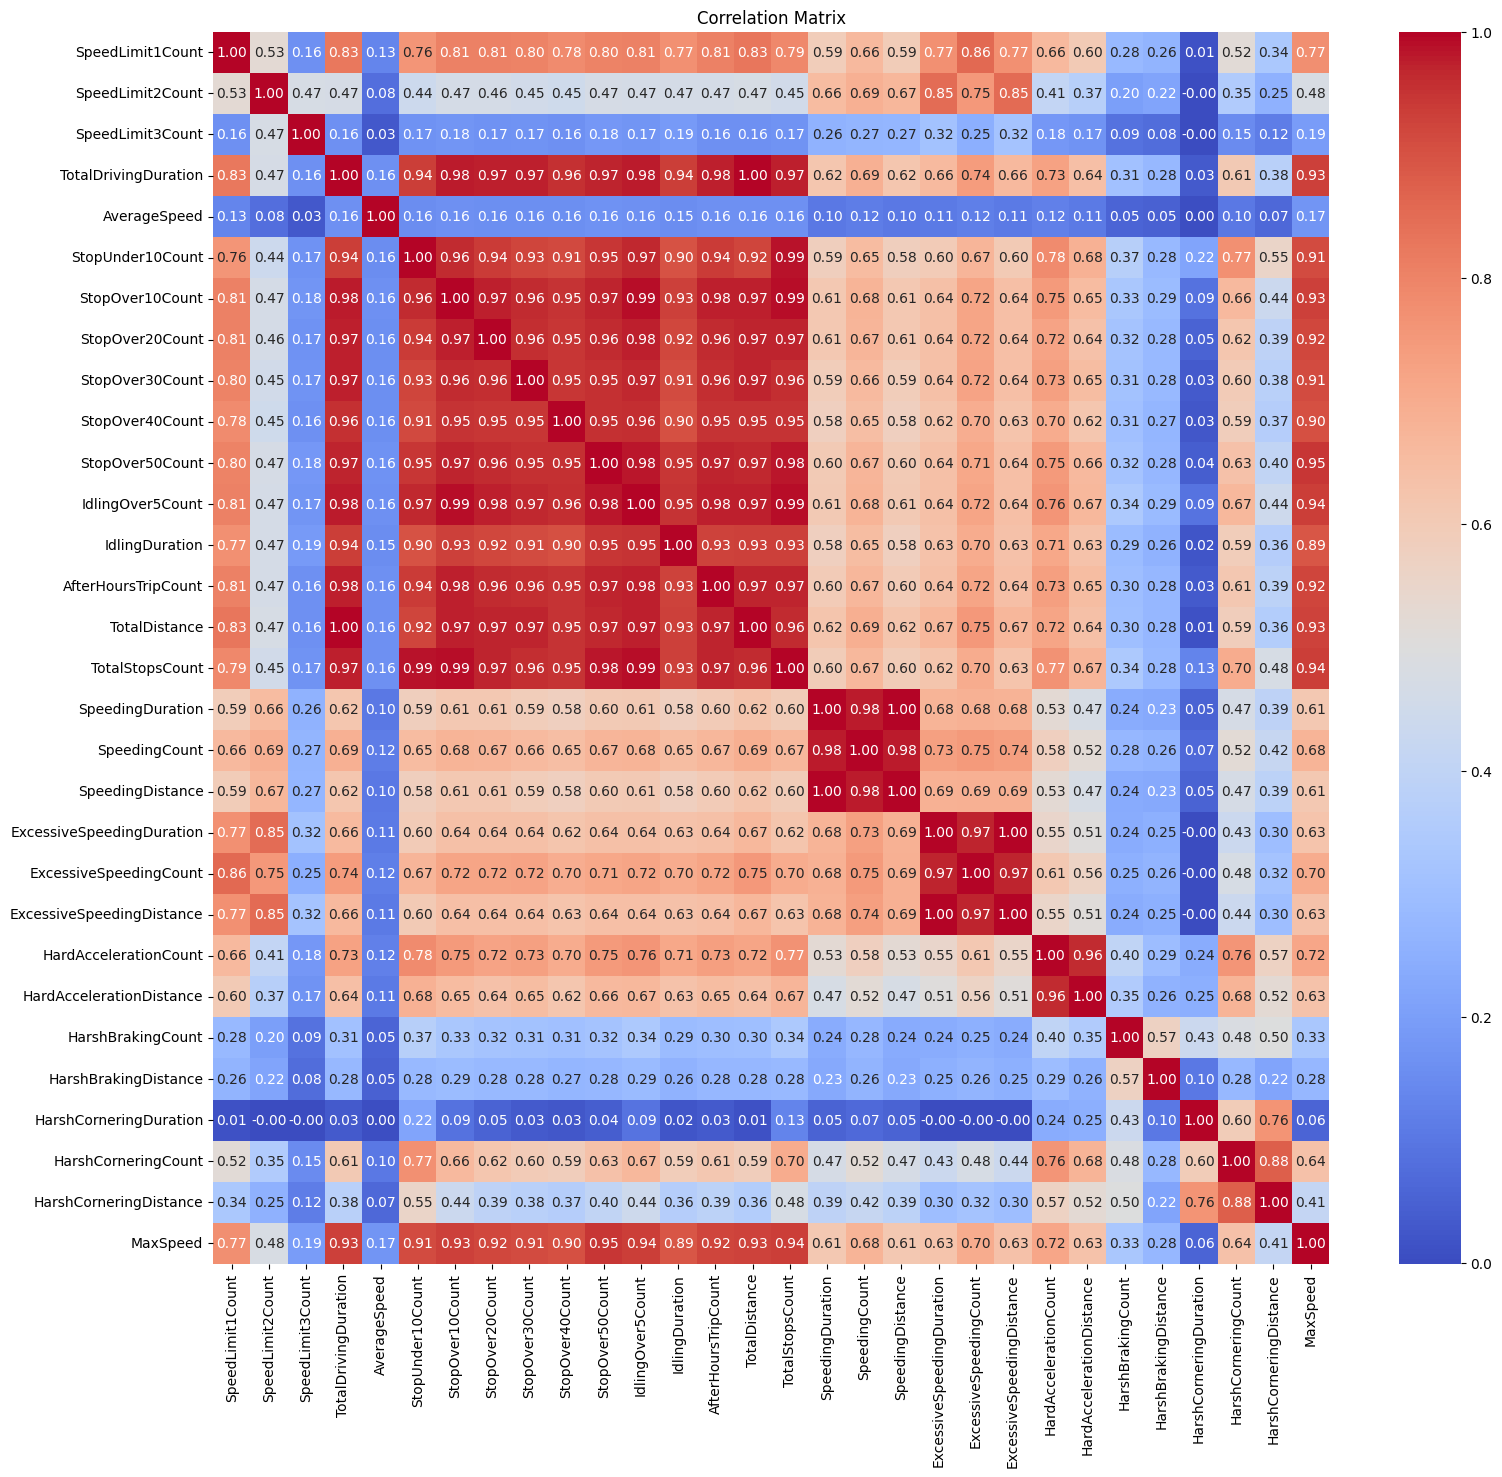

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns

df_safety_original = df_safety.copy()

df_safety = df_safety.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = df_safety.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Histogramas

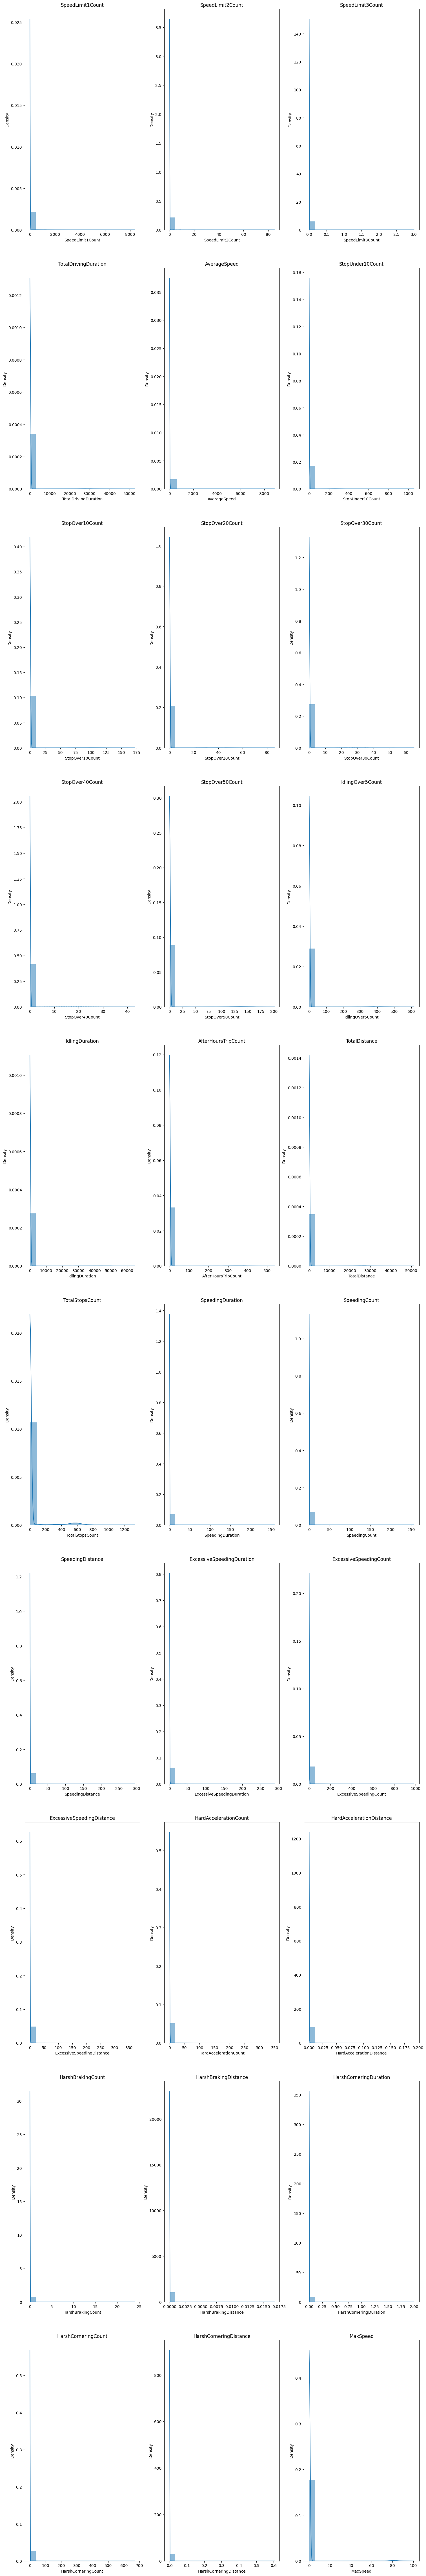

In [ ]:
# Number of columns
num_cols = len(df_safety.columns)


# Calculate grid size for subplots
rows = (num_cols // 3) + 1  # Adjust this as per your layout preference (4 columns per row)
cols = min(num_cols, 3)

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 100))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each column's histogram
index = 0
for col_name, col_data in df_safety.items():
    sns.histplot(col_data, ax=axs[index], kde=True, stat='density', linewidth=0)
    axs[index].set_title(col_name)
    index += 1

# Remove any extra axes
for ax in axs[index:]:
    ax.remove()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## Tabla resumen

Los histogramas en esta base muestran aún mucho ruido. Es necesario limpieza adicional.

Vamos a intentar una aproximación adicional: resumir los datos de los dispositivos. Es decir, generar una tabla resumen que para cada dispositivo en cada columna traiga el promedio de esa columna para dicho dispositivo.

In [ ]:
df_safety_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84828 entries, 0 to 84827
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeviceName                 84827 non-null  object 
 1   DeviceId                   84828 non-null  object 
 2   SpeedLimit1Count           84828 non-null  int64  
 3   SpeedLimit2Count           84828 non-null  int64  
 4   SpeedLimit3Count           84828 non-null  int64  
 5   TotalDrivingDuration       84828 non-null  int64  
 6   AverageSpeed               16384 non-null  float64
 7   StopUnder10Count           84828 non-null  int64  
 8   StopOver10Count            84828 non-null  int64  
 9   StopOver20Count            84828 non-null  int64  
 10  StopOver30Count            84828 non-null  int64  
 11  StopOver40Count            84828 non-null  int64  
 12  StopOver50Count            84828 non-null  int64  
 13  IdlingOver5Count           84828 non-null  int

Este es el código que genera el resumen, pasando de 84828 registros a 9289.

In [ ]:


# Crear la tabla df_safety_summary, sin la columna 'DeviceId', tomando el promedio de los valores por 'DeviceName'
df_safety_summary = df_safety_original.drop(columns=['DeviceId']).groupby('DeviceName').mean().reset_index()


In [ ]:
df_safety_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeviceName                 9281 non-null   object 
 1   SpeedLimit1Count           9281 non-null   float64
 2   SpeedLimit2Count           9281 non-null   float64
 3   SpeedLimit3Count           9281 non-null   float64
 4   TotalDrivingDuration       9281 non-null   float64
 5   AverageSpeed               3208 non-null   float64
 6   StopUnder10Count           9281 non-null   float64
 7   StopOver10Count            9281 non-null   float64
 8   StopOver20Count            9281 non-null   float64
 9   StopOver30Count            9281 non-null   float64
 10  StopOver40Count            9281 non-null   float64
 11  StopOver50Count            9281 non-null   float64
 12  IdlingOver5Count           9281 non-null   float64
 13  IdlingDuration             9281 non-null   float

Ahora. vamos a explorar de esta base, cuántos dispositivos tienen todos los registros en cero o con errores. Son 8371

In [ ]:
# Filtrar todas las filas donde todos los valores (excepto 'DeviceName') sean cero o errores
df_safety_summary_all_zero_or_nan = df_safety_summary[
    df_safety_summary.drop(columns=['DeviceName']).apply(lambda row: all((x == 0 or pd.isna(x)) for x in row), axis=1)
]
df_safety_summary_all_zero_or_nan.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8371 entries, 0 to 9280
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeviceName                 8371 non-null   object 
 1   SpeedLimit1Count           8371 non-null   float64
 2   SpeedLimit2Count           8371 non-null   float64
 3   SpeedLimit3Count           8371 non-null   float64
 4   TotalDrivingDuration       8371 non-null   float64
 5   AverageSpeed               2298 non-null   float64
 6   StopUnder10Count           8371 non-null   float64
 7   StopOver10Count            8371 non-null   float64
 8   StopOver20Count            8371 non-null   float64
 9   StopOver30Count            8371 non-null   float64
 10  StopOver40Count            8371 non-null   float64
 11  StopOver50Count            8371 non-null   float64
 12  IdlingOver5Count           8371 non-null   float64
 13  IdlingDuration             8371 non-null   float64
 1

Hemos creado una tabla safety_summary_clean así:

1. Hemos tomado para cada DeviceName el promedio de sus valores correspondientes por cada columna. Esto implicó eliminar el DeviceID.
2. Hemos eliminado aquellos registros para el cual hemos detectado que todas las columnas están en cero. El resultado todal es una base de 910 filas.

In [ ]:
# Crear una nueva base eliminando todas las filas donde absolutamente todos los valores excepto 'DeviceName' sean cero o errores
df_safety_summary_clean = df_safety_summary[
    ~df_safety_summary.drop(columns=['DeviceName']).apply(lambda row: all((x == 0 or pd.isna(x)) for x in row), axis=1)
]



Esta es una mnuestra de la base final, con el resumen de los dispositivos con datos. Han quedado al final 910 filas.

In [ ]:
df_safety_summary_clean.head()

,DeviceName,SpeedLimit1Count,SpeedLimit2Count,SpeedLimit3Count,TotalDrivingDuration,AverageSpeed,StopUnder10Count,StopOver10Count,StopOver20Count,StopOver30Count,...,ExcessiveSpeedingCount,ExcessiveSpeedingDistance,HardAccelerationCount,HardAccelerationDistance,HarshBrakingCount,HarshBrakingDistance,HarshCorneringDuration,HarshCorneringCount,HarshCorneringDistance,MaxSpeed
74,1000,400.333333,0.333333,0.0,8970.333333,18.40,74.666667,23.666667,10.0,9.666667,...,41.333333,10.180212,23.0,0.011580,0.0,0.0,0.0,27.333333,0.009334,28.168828
75,1001,336.000000,0.000000,0.0,27094.000000,57.90,175.000000,39.000000,12.0,23.000000,...,4.000000,0.120072,42.0,0.013646,0.0,0.0,0.0,63.000000,0.047502,78.914139
76,1002,1363.000000,19.000000,0.0,34431.000000,55.00,282.000000,121.000000,49.0,30.000000,...,286.000000,112.770882,114.0,0.050185,0.0,0.0,0.0,19.000000,0.002770,85.749222
77,1003,391.000000,0.000000,0.0,12357.000000,29.45,73.500000,26.000000,12.5,8.000000,...,22.500000,4.474617,20.0,0.009465,0.0,0.0,0.0,26.500000,0.011286,40.078442
78,1004,408.000000,0.000000,0.0,27209.000000,52.10,255.000000,102.000000,45.0,36.000000,...,47.000000,11.129641,32.0,0.003896,0.0,0.0,0.0,26.000000,0.006231,78.914139


Ahora vamos a graficar los datos

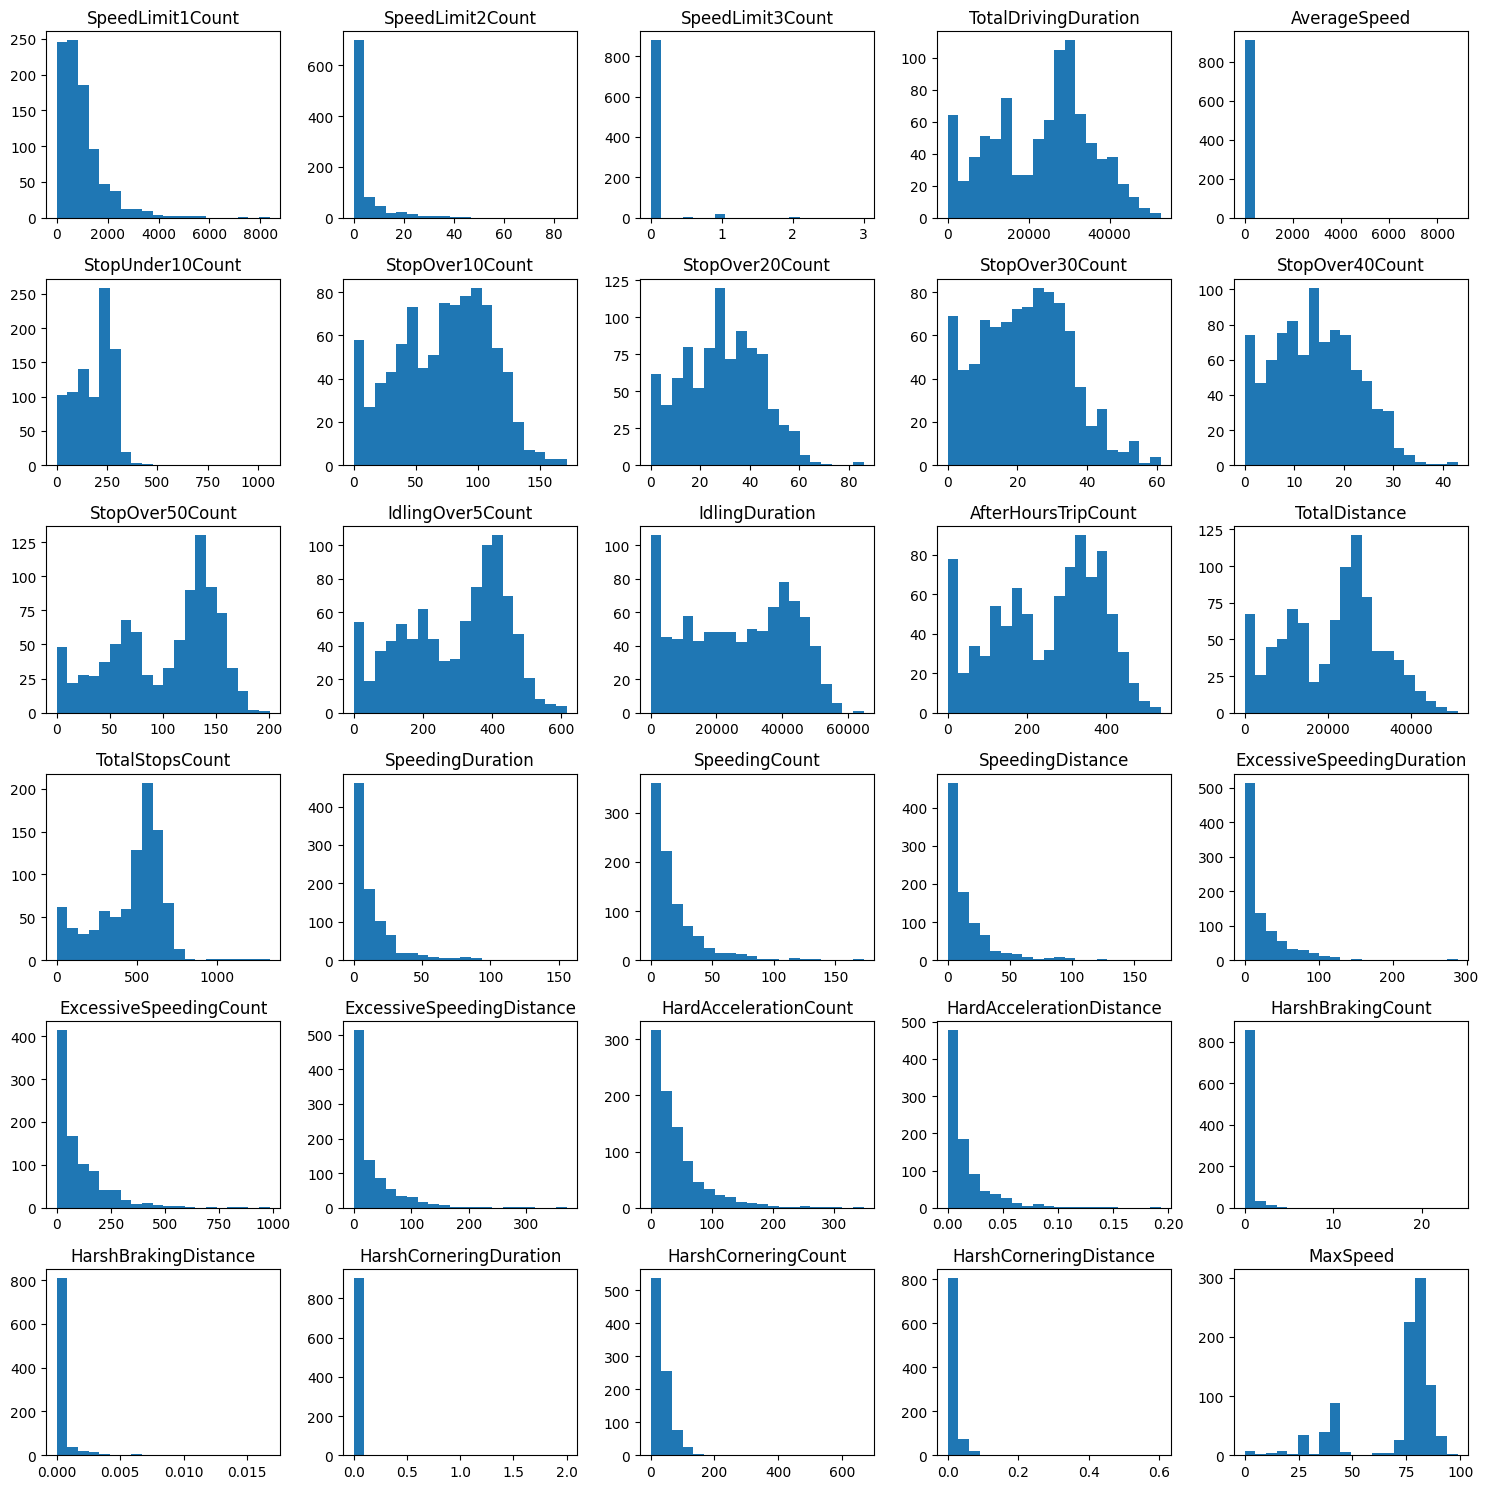

In [ ]:
import matplotlib.pyplot as plt

# Crear histogramas para todas las columnas del DataFrame, excluyendo 'DeviceName'
df_safety_summary_clean.hist(figsize=(15, 15), bins=20, grid=False)
plt.tight_layout()
plt.show()


### Transformación de raíz cuadrada
Como podemos observar, las distribuciones presentan sesgo. Para corregirlo, aplicaremos una transformación de raíz cuadrada. Esta técnica reduce el impacto de los valores extremos, suaviza las distribuciones sesgadas y las acerca a una forma más simétrica, facilitando así el análisis y la modelización de los datos.

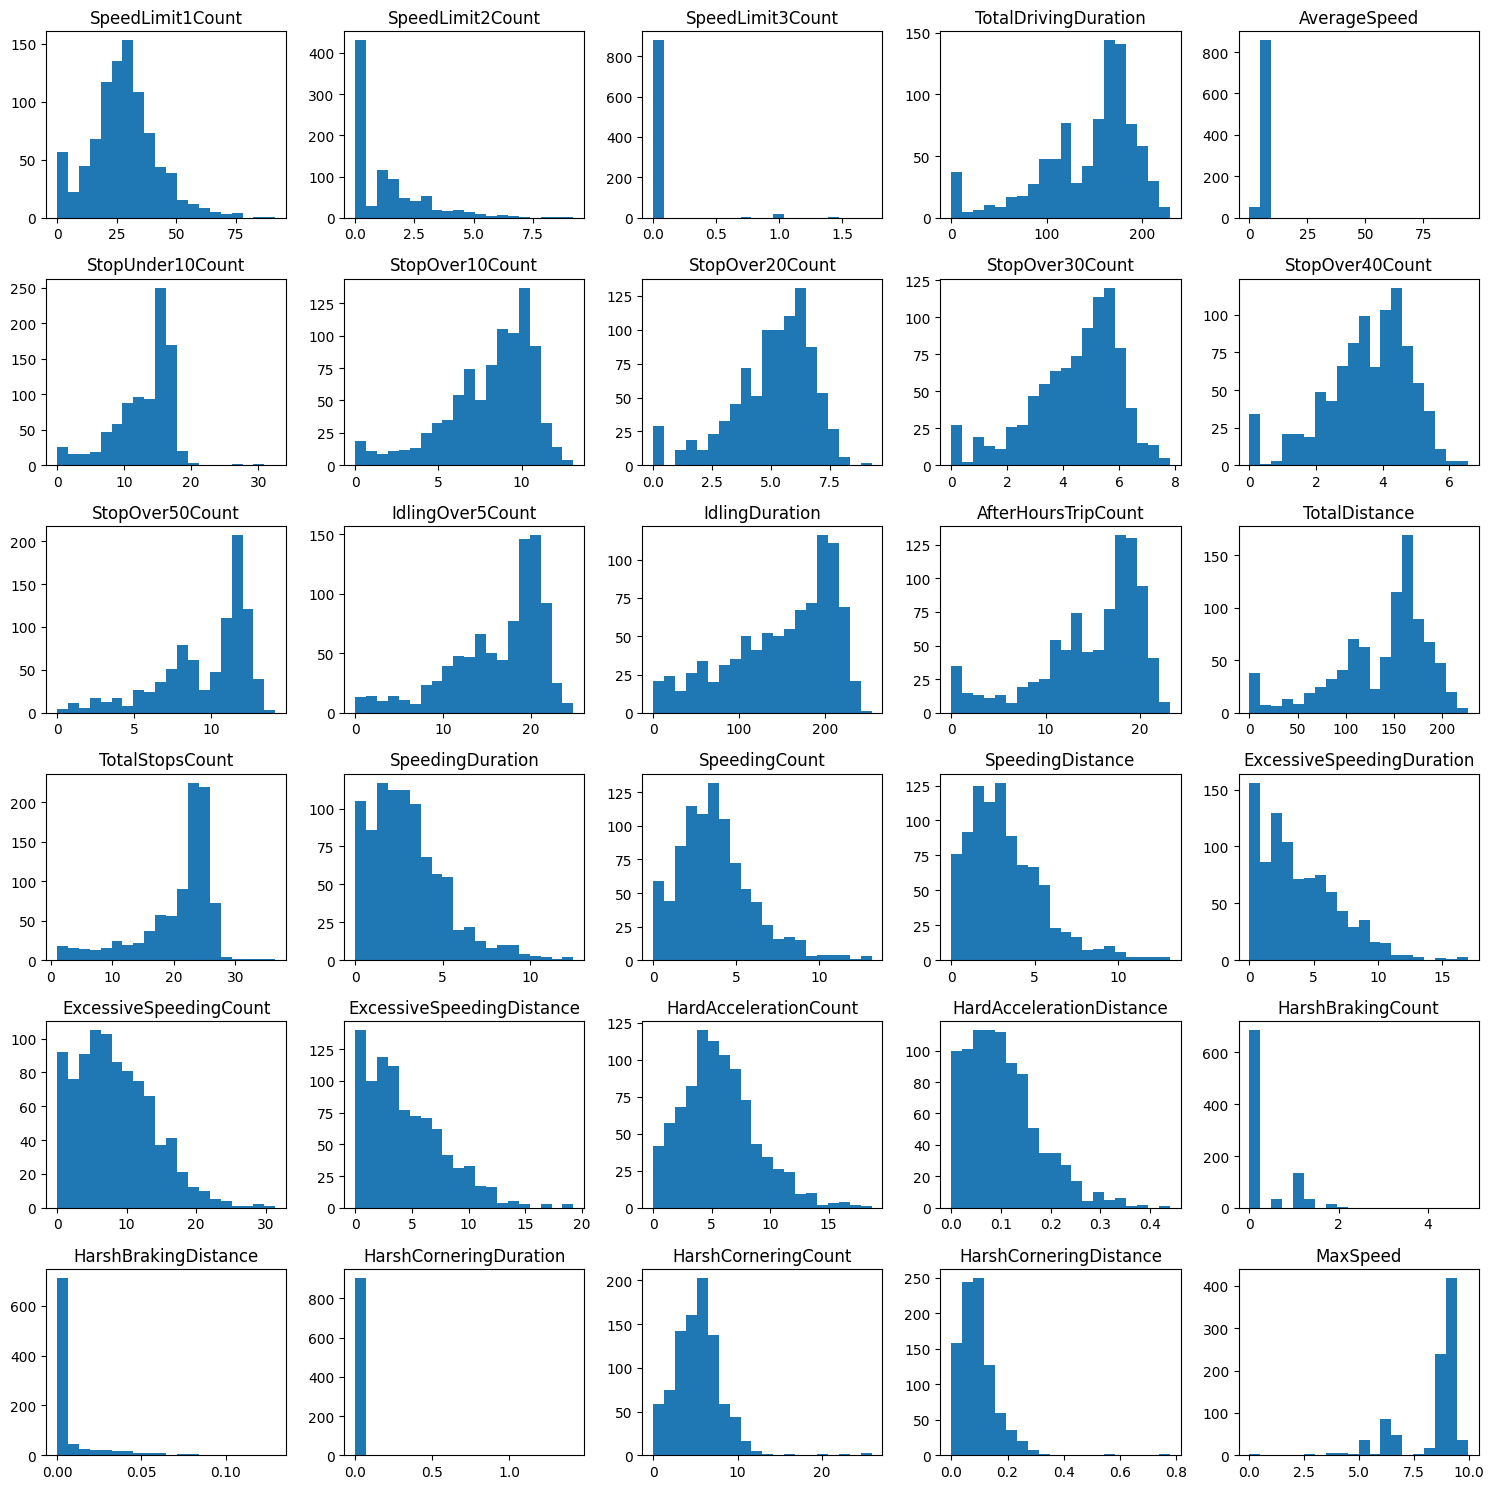

In [ ]:

# Aplicar la transformación de raíz cuadrada a todas las columnas numéricas que no tengan valores negativos
df_safety_summary_sqrt = df_safety_summary_clean.copy()

# Evitar errores en valores negativos aplicando raíz cuadrada solo donde sea posible
for column in df_safety_summary_clean.columns:
    if column != 'DeviceName':  # Excluir 'DeviceName' de la transformación
        # Filtrar las columnas que tienen valores mayores o iguales a 0 para aplicar la raíz cuadrada
        if (df_safety_summary_clean[column] >= 0).all():
            df_safety_summary_sqrt[column] = np.sqrt(df_safety_summary_clean[column])

# Crear los histogramas después de la transformación de raíz cuadrada
df_safety_summary_sqrt.hist(figsize=(15, 15), bins=20, grid=False)
plt.tight_layout()
plt.show()


Y ahora haremos el mapa de correlaciones con la base resumida y limpia

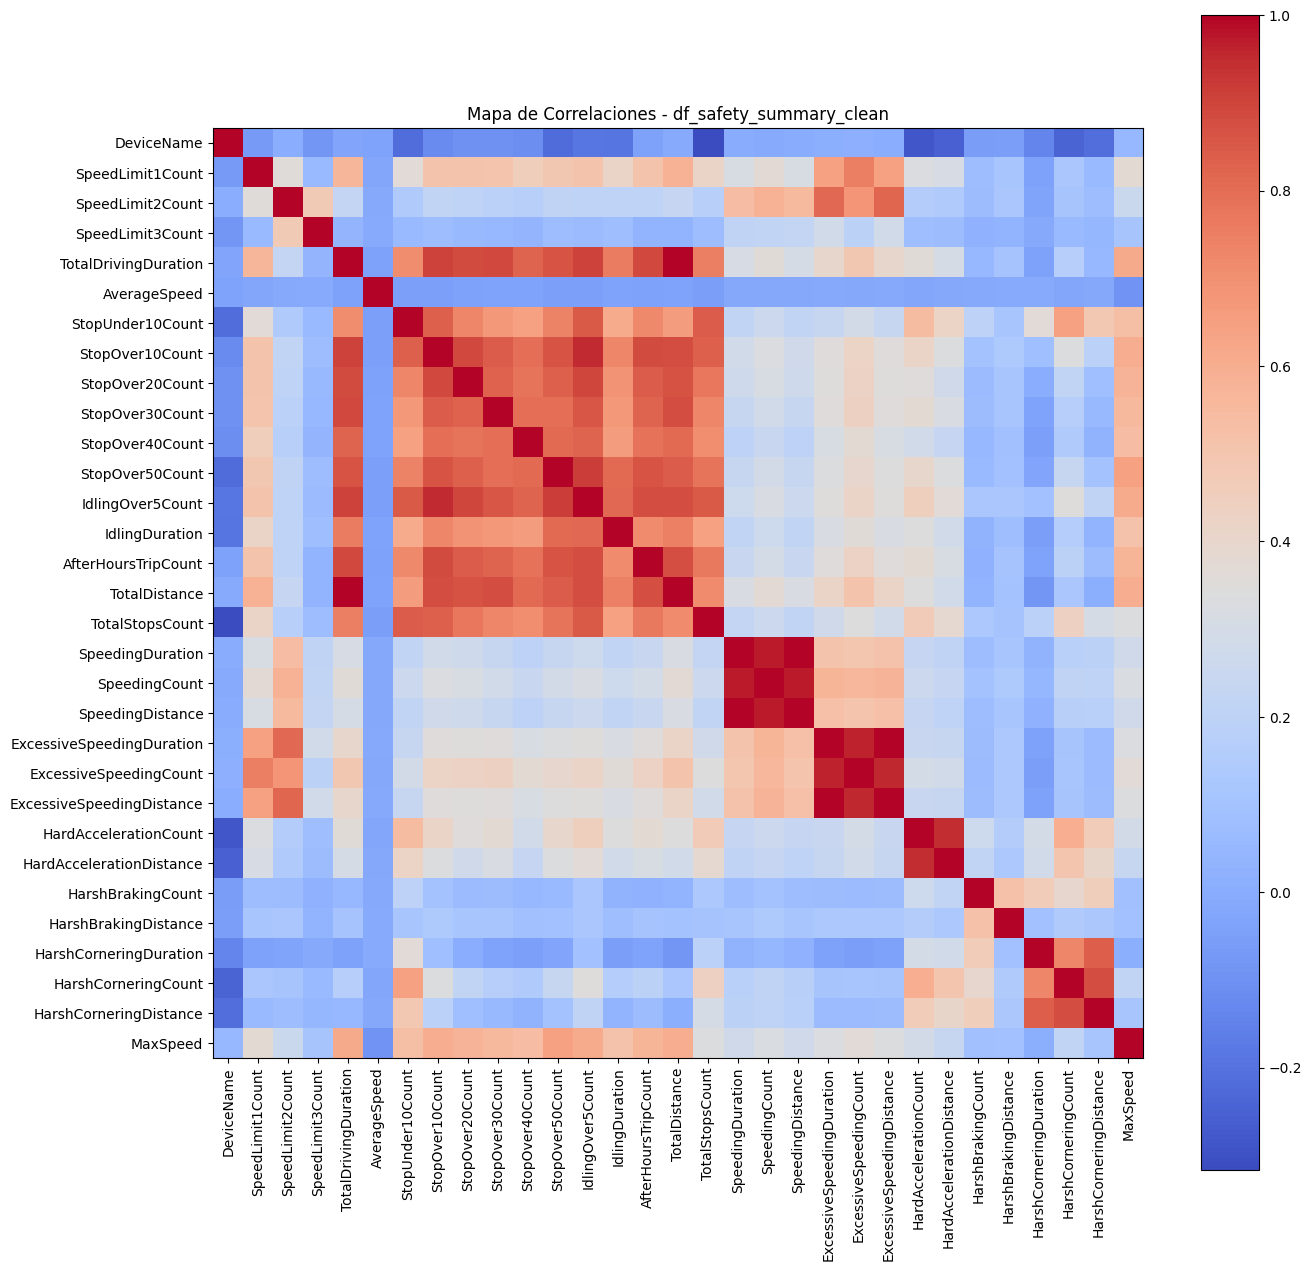

In [ ]:
# Calcular la matriz de correlación del DataFrame transformado
correlation_matrix = df_safety_summary_clean.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 15))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Mapa de Correlaciones - df_safety_summary_clean')
plt.show()
